<a href="https://colab.research.google.com/github/salminadia/Flower_Classification/blob/master/master%20degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **# Loaded data from kaggle API**



In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Colab library to upload files to notebook
from google.colab import files
#Install Kaggle library
!pip install -q kaggle

In [ ]:
#Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "nadiasalmi" # username from the json file
os.environ['KAGGLE_KEY'] = "111559c83d6fb4454e6c3764f5976b64" # key from the json file
!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle

 98% 754M/768M [00:10<00:00, 92.6MB/s]
100% 768M/768M [00:10<00:00, 79.3MB/s]
100% 672M/672M [00:07<00:00, 83.7MB/s]

 94% 126M/134M [00:01<00:00, 71.9MB/s]
100% 134M/134M [00:01<00:00, 99.3MB/s]


In [2]:
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


 **EDA - Exploratory Data Analysis, analyse et ex-
ploration des données (dataset)**

In [3]:
# Importation des librairies
# numpy et pandas pour la manipulation de données
import pandas as pd
import numpy as np

# sklearn prétraitement pour traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour tracer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#lecture ensemble d'entrainement
import pandas as pd
train = pd.read_csv('train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

In [ ]:
#afficher le nbr des colonnes et nrb de lignes
train.shape
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [ ]:
#lecture ensemble de test
import pandas as pd
test = pd.read_csv('test.csv')

In [ ]:
#afficher le nbr des colonnes et nrb de lignes
test.shape
test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,...,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,...,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,...,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,...,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:D

**Visualisation des données**


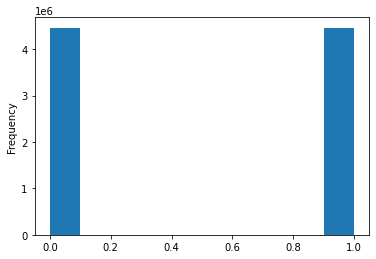

In [ ]:
#Visualisation de la cible (HasDetections)
train['HasDetections'].value_counts()
train['HasDetections'].astype(int).plot.hist();

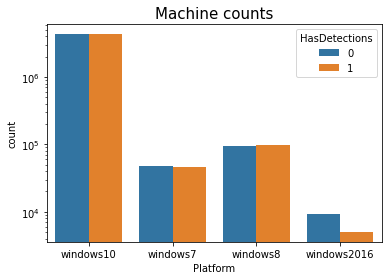

In [ ]:
#Analyse des machines infecte en fonction de "Platform"
sns.countplot(x='Platform', hue='HasDetections', data=train)
plt.yscale('log')
plt.title('Machine counts', size=15)
plt.show()

In [ ]:
#Analyse des valeurs manquantes
#Nous pouvons examiner le nombre et le pourcentage des valeurs manquantes dans chaque colonne.
# Fonction permettant de calculer les valeurs manquantes par colonne
def table_valeurs_manquantes(df):
        # Total des valeurs manquantes
        val_manq = df.isnull().sum()
        
        # Pourcentage de valeurs manquantes
        porcent_val_manq = 100 * df.isnull().sum() / len(df)
        
        # Faire un tableau avec les résultats
        table_val_manq = pd.concat([val_manq, porcent_val_manq], axis=1)
        
        # Renommer les colonnes
        ren_colonne_table_val_manq = table_val_manq.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% sur les valeurs totales'})
        
        # Trier le tableau par pourcentage de val manquante (décroissant)
        ren_colonne_table_val_manq = ren_colonne_table_val_manq[
            ren_colonne_table_val_manq.iloc[:,1] != 0].sort_values(
        '% sur les valeurs totales', ascending=False).round(1)
        
        # Afficher des informations sommaires
        print ("Votre dataframe sélectionné a " + str(df.shape[1]) + " colonnes.\n"      
            "il y a " + str(ren_colonne_table_val_manq.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Renvoie la dataframe avec les informations manquantes
        return ren_colonne_table_val_manq

In [ ]:
# Statistiques de valeurs manquantes
valeurs_manquantes = table_valeurs_manquantes(train)
valeurs_manquantes.head(20)

Votre dataframe sélectionné a 83 colonnes.
il y a 44 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,% sur les valeurs totales
PuaMode,8919174,100.0
Census_ProcessorClass,8884852,99.6
DefaultBrowsersIdentifier,8488045,95.1
Census_IsFlightingInternal,7408759,83.0
Census_InternalBatteryType,6338429,71.0
Census_ThresholdOptIn,5667325,63.5
Census_IsWIMBootEnabled,5659703,63.4
SmartScreen,3177011,35.6
OrganizationIdentifier,2751518,30.8
SMode,537759,6.0


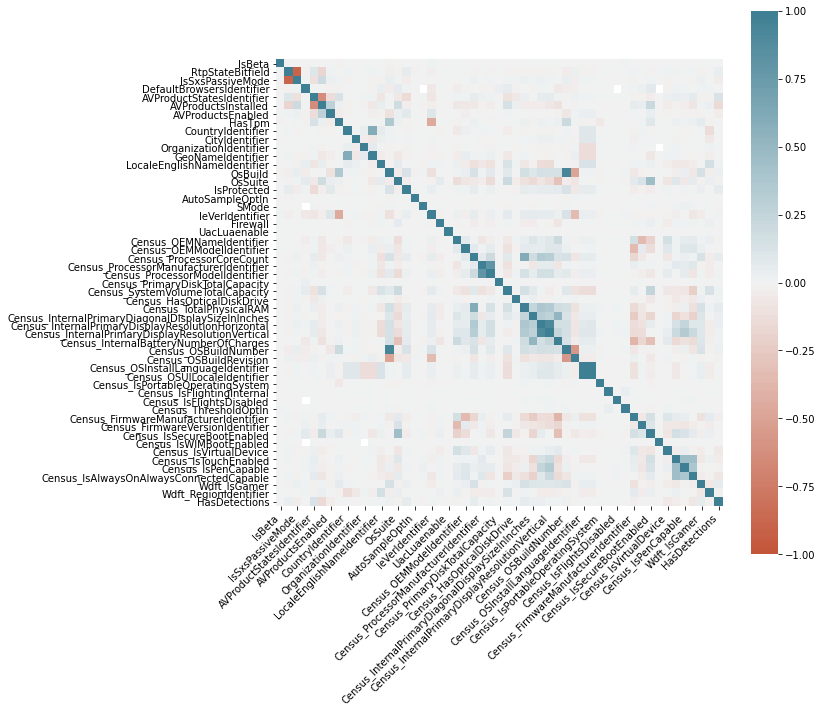

In [ ]:

corr = train.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# Trouver des corrélations avec la cible et trier
correlations = train.corr()['HasDetections'].sort_values()

# Afficher les corrélations
print('Corrélations les plus positives:\n', correlations.tail(50))
print('\nCorrélations les plus négatives:\n', correlations.head(50))

Corrélations les plus positives:
 AVProductsInstalled                                 -0.149626
Census_IsTouchEnabled                               -0.040410
Census_FirmwareManufacturerIdentifier               -0.025924
Wdft_RegionIdentifier                               -0.022855
OsSuite                                             -0.020301
Census_OEMNameIdentifier                            -0.015541
LocaleEnglishNameIdentifier                         -0.009981
Census_OSBuildRevision                              -0.009342
Census_OEMModelIdentifier                           -0.004512
CityIdentifier                                      -0.002282
Census_FirmwareVersionIdentifier                    -0.002047
Census_IsSecureBootEnabled                          -0.001711
Census_ThresholdOptIn                               -0.000757
Census_IsWIMBootEnabled                             -0.000545
Census_PrimaryDiskTotalCapacity                      0.000170
Census_IsFlightingInternal          

# Feature engineering

> Pré traitement des données







In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
# en raison des limitations de la mémoire de  et de l'énorme taille du jeu de données, un échantillon de l'ensemble
train_sample_fraction = 1

# Valeurs NA qui dépassent ce taux
na_rate_threshold = 0.9

#seuil pour supprimer les colonnes avec des caractéristiques déséquilibrées à leurs valeurs 
unbalanced_feature_rate_threshold = 0.9


In [ ]:
#l'idée principale de charger le jeu de données et d'économiser de l'espace mémoire !!
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    #ne pas copie recurciv deep = true
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

*Base d'entrainement*

---



In [ ]:
import time
start_time = time.time()
import pandas as pd
train = pd.read_csv('train.csv', dtype=dtypes)

print("--- %s seconds ---" % (time.time() - start_time))

--- 144.6185073852539 seconds ---


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                    

In [ ]:
good_cols = list(train.columns)

for col in train.columns:
    
# supprimer les colonnes avec un taux NA élevé
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # supprimer les colonnes avec un taux élevé de valeurs asymétriques
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)
    

In [ ]:
good_cols

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion

In [ ]:
train = train[good_cols]

In [ ]:
import gc

gc.collect()

0

In [ ]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

In [ ]:
import gc
train_sample = train.sample(frac=train_sample_fraction, random_state=42)



In [ ]:
train_sample.shape

(1784297, 57)

**Base de test**

---



In [ ]:
test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}

# get all columns except
test = pd.read_csv('test.csv', dtype=test_dtypes, usecols=good_cols[:-1])

#test = reduce_mem_usage(test)

In [ ]:
train_ids = train_sample['MachineIdentifier']
test_ids = test['MachineIdentifier']

In [ ]:
#supprission du MachineIdentifier pour faciliter l'encoding
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)

test = test.drop(['MachineIdentifier'], axis=1)

In [ ]:
train_sample = train_sample.reset_index(drop=True)

In [ ]:
train_sample.shape

(1784297, 56)

In [ ]:
test.shape

(7853253, 55)

In [ ]:
#Remplir les valeurs NA avec le mode statistique
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [ ]:
#Remplir les valeurs NA avec le mode statistique
modes_test = test.mode()

for col in test.columns:
    test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
del modes_test

In [ ]:
#Encoder les fonctionnalités catégorielles (train)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, train_sample)

In [ ]:
#Encoder les fonctionnalités catégorielles (train)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, test)

In [ ]:
train_cols = [c for c in train_sample.columns if c not in ["HasDetections"]]
y_train = train_sample["HasDetections"]

In [ ]:
y_train.value_counts()

0    893061
1    891236
Name: HasDetections, dtype: int64

In [ ]:
y_train = train_sample['HasDetections']
X_train = train_sample.drop(['HasDetections'], axis=1)
X_train.shape, y_train.shape, test.shape

((1784297, 55), (1784297,), (7853253, 55))

In [ ]:
train_sample.shape

(8921483, 56)

**Feature selection**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(xtrain, ytrain)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
sel.get_support()

array([False, False,  True,  True, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True])

In [ ]:
selected_feat= xtrain.columns[(sel.get_support())]
len(selected_feat)

21

In [ ]:
selected_feat


Index(['AvSigVersion', 'AVProductStatesIdentifier', 'CountryIdentifier',
       'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier',
       'SmartScreen', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_OSVersion',
       'Census_OSBuildRevision', 'Census_OSInstallTypeName',
       'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier'],
      dtype='object')

In [ ]:
#new ensemle de test avec 21 features sélecionné
test = test[selected_feat]

In [ ]:
train_sample.shape

(1784297, 22)

In [ ]:
#new ensmble d'entrainement
train_sample = train_sample.drop(['EngineVersion',
 'AppVersion',
 'AVProductsInstalled',
 'OrganizationIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'Census_MDC2FormFactor',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer'], axis=1)

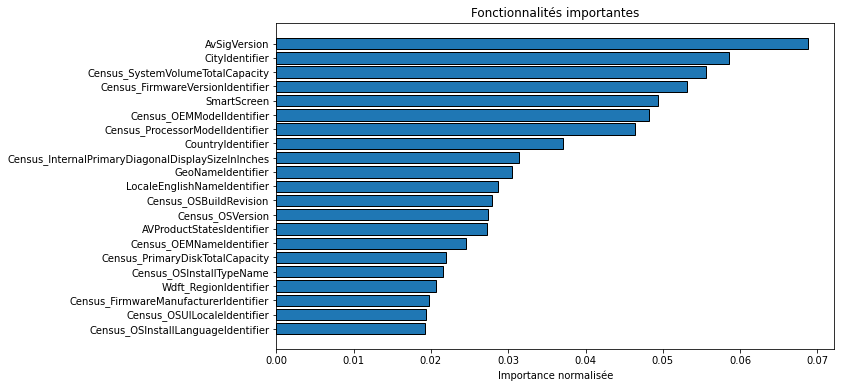

In [ ]:
# Afficher les importances des fonctionnalités pour les fonctionnalités par défaut
feature_importances_sorted = plot_feature_importances(feature_importances)

# Modéle de base

# xgboost + fit(0.7286)

In [ ]:
#imports
import numpy as np
import pandas as pd
import gc
import time
import random
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plot
import seaborn as sb

In [ ]:
y = train_sample['HasDetections']
X= train_sample.drop(['HasDetections'], axis=1)

## xgboost+fit(sans tuning)0.73


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random


In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]

    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.690704	validation_1-auc:0.684981
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.733636	validation_1-auc:0.716093
[200]	validation_0-auc:0.749958	validation_1-auc:0.722798
[300]	validation_0-auc:0.760668	validation_1-auc:0.726149
[400]	validation_0-auc:0.768406	validation_1-auc:0.727812
[500]	validation_0-auc:0.774161	validation_1-auc:0.728902
[600]	validation_0-auc:0.779129	validation_1-auc:0.729728
[700]	validation_0-auc:0.783927	validation_1-auc:0.730272
[800]	validation_0-auc:0.788013	validation_1-auc:0.730679
[900]	validation_0-auc:0.791543	validation_1-auc:0.730992
[1000]	validation_0-auc:0.795255	validation_1-auc:0.731316
[1100]	validation_0-auc:0.798557	validation_1-auc:0.731543
[1200]	validation_0-auc:0.801928	validation_1-auc:0.731778
[1300]	validation_0-auc:0.805357	validation_1-auc:0.73203
[1400]	validation_0-a

#autre essay 0.73 

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]

    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=13,
                            min_child_weight=11,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.697782	validation_1-auc:0.686819
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.754681	validation_1-auc:0.719772
[200]	validation_0-auc:0.777108	validation_1-auc:0.725959
[300]	validation_0-auc:0.791477	validation_1-auc:0.728771
[400]	validation_0-auc:0.802406	validation_1-auc:0.730384
[500]	validation_0-auc:0.809066	validation_1-auc:0.731104
[600]	validation_0-auc:0.814557	validation_1-auc:0.731543
[700]	validation_0-auc:0.820199	validation_1-auc:0.731971
[800]	validation_0-auc:0.825347	validation_1-auc:0.73223
[900]	validation_0-auc:0.830139	validation_1-auc:0.732547
[1000]	validation_0-auc:0.834623	validation_1-auc:0.732692
[1100]	validation_0-auc:0.838729	validation_1-auc:0.732843
[1200]	validation_0-auc:0.842611	validation_1-auc:0.73287
[1300]	validation_0-auc:0.847108	validation_1-auc:0.732895
[1400]	validation_0-au

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['HasDetections'] = predictions_proba_test_list
submission.to_csv('xgboost2.csv', index=False)

In [ ]:
del X
del y
del train_X
del train_y
del valid_X
del valid_y
del predictions
del predictions_probas
del temp_predictions_proba_test_list
del clf_xgb
gc.collect()

24

In [ ]:
xgb = pd.read_csv('xgboost2.csv')

In [ ]:
xgb.head(15)

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,2.798686
1,00000176ac758d54827acd545b6315a5,3.176848
2,0000019dcefc128c2d4387c1273dae1d,2.721849
3,0000055553dc51b1295785415f1a224d,2.270884
4,00000574cefffeca83ec8adf9285b2bf,3.198299
5,000007ffedd31948f08e6c16da31f6d1,2.397978
6,000008f31610018d898e5f315cdf1bd1,0.844920
7,00000a3c447250626dbcc628c9cbc460,1.775288
8,00000b6bf217ec9aef0f68d5c6705897,2.150014
9,00000b8d3776b13e93ad83676a28e4aa,2.310991


In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
    new_seed =  random.randint(1, 2000)
    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.1, 
                            n_estimators=4000, 
                            max_depth=8,
                            min_child_weight=4,
                            gamma=0,
                            subsample=0.8,
                            colsample_bytree=0.2,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.1,
                            reg_lambda = 1,
                            seed=new_seed
                            )

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.630129	validation_1-auc:0.629153
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.726367	validation_1-auc:0.717048
[200]	validation_0-auc:0.738382	validation_1-auc:0.72276
[300]	validation_0-auc:0.746387	validation_1-auc:0.725129
[400]	validation_0-auc:0.752223	validation_1-auc:0.726402
[500]	validation_0-auc:0.757344	validation_1-auc:0.727208
[600]	validation_0-auc:0.761773	validation_1-auc:0.727838
[700]	validation_0-auc:0.765753	validation_1-auc:0.728323
[800]	validation_0-auc:0.769836	validation_1-auc:0.728394
[900]	validation_0-auc:0.773644	validation_1-auc:0.728726
[1000]	validation_0-auc:0.77722	validation_1-auc:0.728976
[1100]	validation_0-auc:0.78076	validation_1-auc:0.729041
[1200]	validation_0-auc:0.784144	validation_1-auc:0.729115
[1300]	validation_0-auc:0.787342	validation_1-auc:0.729164
Stopping. Best iteratio

In [ ]:
! pip install scikit-plot

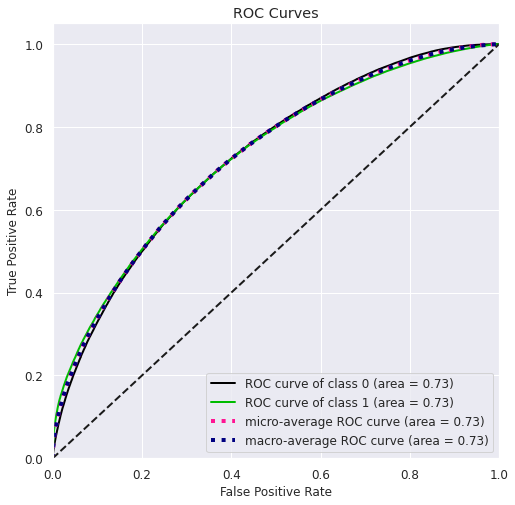

In [ ]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
predictions_probas = clf_xgb.predict_proba(valid_X)
skplt.metrics.plot_roc(valid_y, predictions_probas)

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [ ]:
X_train = train.drop('HasDetections', axis=1)
y_train = train['HasDetections']


X_train.shape, y_train.shape, test.shape

((8921483, 56), (8921483,), (7853253, 55))

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

In [ ]:
# plot single tree
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

xgboost avec 0.8 train

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
    new_seed =  random.randint(1, 2000)
    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.01, 
                            n_estimators=100, 
                            max_depth=8,
                            min_child_weight=53,
                            gamma=0,
                            subsample=0.8,
                            colsample_bytree=0.7,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.1,
                            reg_lambda = 1,
                            seed=new_seed)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    #print()
    #print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))

    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()

    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))


gc.collect()

Fold: 0
[0]	validation_0-auc:0.642393	validation_1-auc:0.640842
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.698482	validation_1-auc:0.696463

accuracy_score 0.634052569635151
auc score 0.6964630776828924

Fold: 1
[0]	validation_0-auc:0.675957	validation_1-auc:0.674819
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.698975	validation_1-auc:0.697013

accuracy_score 0.6352154906686095
auc score 0.6970126703784647

Fold: 2
[0]	validation_0-auc:0.647481	validation_1-auc:0.647491
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.699464	validation_1-auc:0.697149

accuracy_score 0.6355759557696458

# FLASK

In [ ]:
import pickle
with open('clf_xgb.pkl', 'wb') as fid:
    pickle.dump(clf_xgb, fid,2) 

In [ ]:
cat = train_sample.drop('HasDetections',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) 

In [ ]:
!pip install flask gunicorn


     |████████████████████████████████| 81kB 2.4MB/s 


In [ ]:
['AvSigVersion', 'AVProductStatesIdentifier', 'CountryIdentifier',
       'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier',
       'SmartScreen', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np
from flask import Flask, render_template
app = Flask(__name__, template_folder='drive/My Drive/templates')


run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
	return render_template('home.html')

@app.route('/getdelay',methods=['POST'])
def get_delay():
    if request.method=='POST':
        result=request.form
		
		#Prepare the feature vector for prediction
        pkl_file = open('cat', 'rb')
        index_dict = pickle.load(pkl_file)
        new_vector = np.zeros(len(index_dict))
        
        try:
            new_vector[index_dict['AvSigVersion'+str(result['day_of_week'])]] = 1
        except:
            pass
        try:
            new_vector[index_dict['AVProductStatesIdentifier'+str(result['unique_carrier'])]] = 1
        except:
            pass
       
        
        pkl_file = open('clf_xgb.pkl', 'rb')
        logmodel = pickle.load(pkl_file)
        prediction = logmodel.predict(new_vector)
        
        return render_template('result.html',prediction=prediction)

    
if __name__ == '__main__':
	app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://711a3c0b46ff.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Oct/2020 08:34:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Oct/2020 08:34:21] "GET /favicon.ico HTTP/1.1" 404 -
[2020-10-17 08:34:27,324] ERROR in app: Exception on /getdelay [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.6/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.e

In [ ]:
!pip install jupyter-dash

     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 3.4MB 10.5MB/s 
     |████████████████████████████████| 194kB 36.4MB/s 
     |████████████████████████████████| 1.8MB 30.1MB/s 
     |████████████████████████████████| 358kB 57.2MB/s 
  Created wheel for ansi2html: filename=ansi2html-1.5.2-cp36-none-any.whl size=13862 sha256=2d2a951cded9495142226a3cefae32998375a2bed6558f50fd9bd0ea44ce4c06
  Stored in directory: /root/.cache/pip/wheels/f9/ea/e0/1ed3c3945ce073f930f3e5aa2b9bbadb03cd2efc8f8695cd61
  Created wheel for dash: filename=dash-1.16.3-cp36-none-any.whl size=82488 sha256=152de3b77a65e9c8d133b9460d806863b2125ff78fff1714c2f77808109ae034
  Stored in directory: /root/.cache/pip/wheels/8f/56/d1/def235a9ef977abf4476d1ad7a3ad8d9af7537445ce01c5e16
  Created wheel for flask-compress: filename=Flask_Compress-1.7.0-cp36-none-any.whl size=6833 

In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=54b75299c61bac61d4acc1498c82d45e460d2b6f8bce09d3205ef72299ee2abe
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok


In [ ]:
!ngrok authtoken xxxxxxxxxxxxx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
pip freeze > requirements.txt

In [ ]:
web: gunicorn app:2xgboost

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
plt.savefig("C:\code\piechart.pdf", bbox_inches="tight", pad_inches=10, transparent=True)


<Figure size 432x288 with 0 Axes>

In [ ]:
er

# tracer arbre

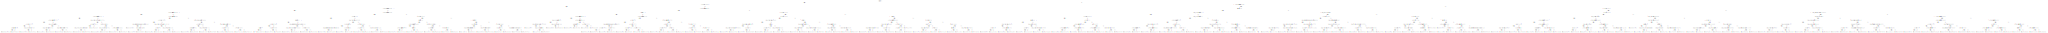

In [ ]:
xgb.to_graphviz(clf_xgb, num_trees=1)
plt.savefig("C:\code\piechart.pdf", bbox_inches="tight", pad_inches=10, transparent=True)


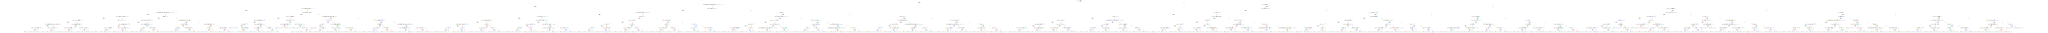

In [ ]:
xgb.to_graphviz(clf_xgb, num_trees=2)


In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
xgb.to_graphviz(clf_xgb, num_trees=1)
plt.savefig("pt2.jpg")

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot single tree
plot_tree(clf_xgb)
plt.show()
plot_tree(clf_xgb,tree_index=1,rankdir='LR')


<Figure size 7200x5760 with 0 Axes>

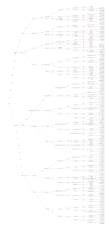

In [ ]:
plt.figure(figsize=((100,80)))
xgb.plot_tree(clf_xgb, num_trees=-2, rankdir='LR')
plt.show()

In [ ]:
xgb.plot_tree(clf_xgb, num_trees=0, rankdir='LR')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100, 105)

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
    new_seed =  random.randint(1, 2000)
    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.01, 
                            n_estimators=250, 
                            max_depth=6,
                            min_child_weight=53,
                            gamma=0,
                            subsample=0.8,
                            colsample_bytree=0.7,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.1,
                            reg_lambda = 1,
                            seed=new_seed)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.669431	validation_1-auc:0.668788
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.689585	validation_1-auc:0.688773
[200]	validation_0-auc:0.694546	validation_1-auc:0.693592
[249]	validation_0-auc:0.69684	validation_1-auc:0.69583

              precision    recall  f1-score   support

           0       0.64      0.61      0.62    179012
           1       0.63      0.66      0.64    177848

    accuracy                           0.63    356860
   macro avg       0.64      0.63      0.63    356860
weighted avg       0.64      0.63      0.63    356860


accuracy_score 0.6346550467970633
auc score 0.6958301196866148

Fold: 1
[0]	validation_0-auc:0.67133	validation_1-auc:0.671239
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 

In [ ]:
# Afficher les importances des fonctionnalités pour les fonctionnalités par défaut
feature_importances_sorted = plot_feature_importances(feature_importances)

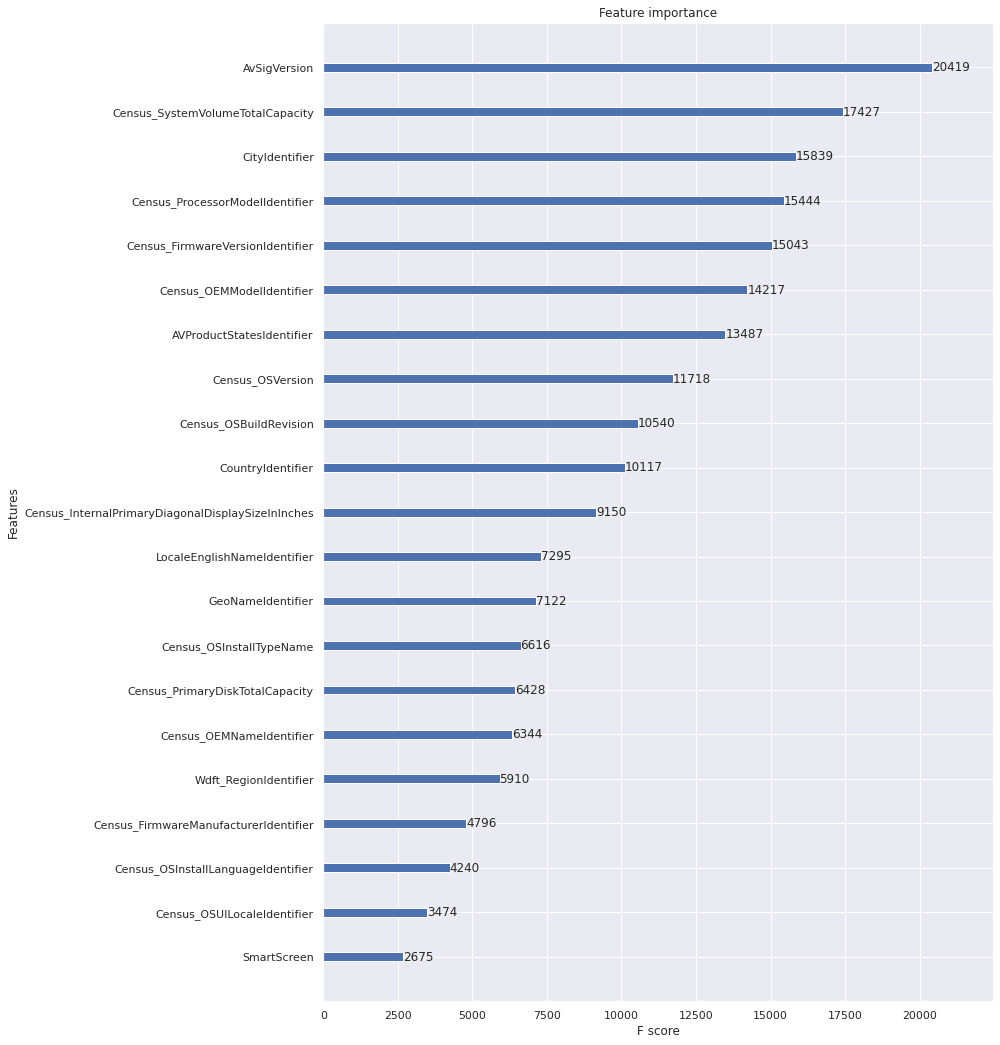

In [ ]:
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

arbre.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot single tree
sns.set(rc={'figure.figsize':(488,488)})
xgb.plot_tree(clf_xgb,rankdir='LR')
plt.show()

# catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 64kB/s 


In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn import model_selection, preprocessing, metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import lightgbm as lgb
import xgboost as xgb
import catboost as cb


In [ ]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [ ]:
target = train_sample['HasDetections']
del train_sample['HasDetections']

In [ ]:
K = 5
index = 0

fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
 
    
    model =cb.CatBoostClassifier(
        iterations=1000,
        od_type='Iter',
        eval_metric = 'AUC',
        od_wait=25,
        verbose=100, 
        loss_function='Logloss'
    )

    model.fit(
      train_X, train_y,
        eval_set=(valid_X, valid_y)
    )
    

    
    predictions = model.predict(valid_X)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = model.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
Learning rate set to 0.190583
0:	test: 0.6622372	best: 0.6622372 (0)	total: 203ms	remaining: 3m 22s
100:	test: 0.7079218	best: 0.7079218 (100)	total: 9.51s	remaining: 1m 24s
200:	test: 0.7151872	best: 0.7151872 (200)	total: 18.8s	remaining: 1m 14s
300:	test: 0.7186928	best: 0.7186928 (300)	total: 28.1s	remaining: 1m 5s
400:	test: 0.7207314	best: 0.7207314 (400)	total: 37.6s	remaining: 56.1s
500:	test: 0.7221674	best: 0.7221674 (500)	total: 47s	remaining: 46.8s
600:	test: 0.7231494	best: 0.7231494 (600)	total: 56.4s	remaining: 37.4s
700:	test: 0.7238302	best: 0.7238461 (695)	total: 1m 5s	remaining: 28s
800:	test: 0.7245179	best: 0.7245179 (800)	total: 1m 15s	remaining: 18.6s
900:	test: 0.7250143	best: 0.7250183 (898)	total: 1m 24s	remaining: 9.27s
999:	test: 0.7253328	best: 0.7253333 (998)	total: 1m 33s	remaining: 0us

bestTest = 0.7253332849
bestIteration = 998

Shrink model to first 999 iterations.

              precision    recall  f1-score   support

           0       0.66

0

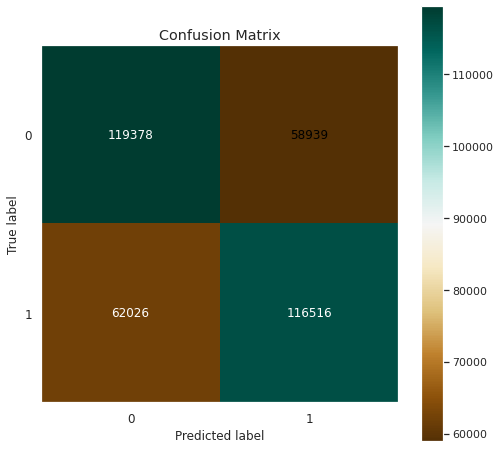

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(valid_y, predictions, cmap="BrBG")

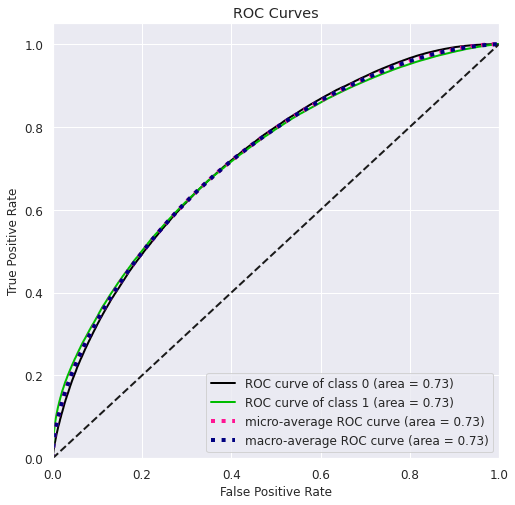

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
predictions_probas = model.predict_proba(valid_X)
skplt.metrics.plot_roc(valid_y, predictions_probas)

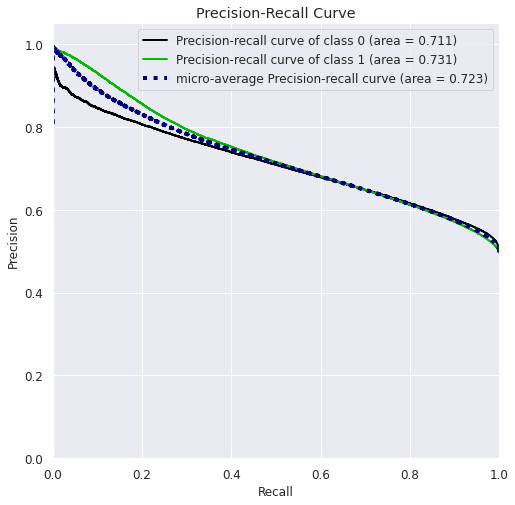

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
x=skplt.metrics.plot_precision_recall(valid_y, predictions_probas)

In [ ]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier

import matplotlib.pyplot as plt

ValueError: ignored

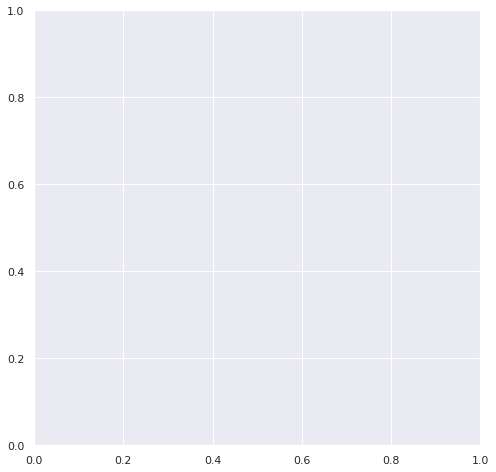

In [ ]:
# plot single tree
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
fig.savefig('x.png')

<Figure size 576x576 with 0 Axes>

In [ ]:

Mean_auc = np.mean(fold_auc_list)

In [ ]:
Mean_auc

0.7249216066931227

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, train_X, train_y,
                                          'catboost', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
import numpy as np 
import pandas as pd 
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score,  precision_score, recall_score, confusion_matrix
import xgboost as xgb

In [ ]:
K = 5
index = 0

fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
 
    
    model =xgb.XGBClassifier(learning_rate=0.0936165921314771, 
                            n_estimators=1300, 
                            max_depth=2,
                            min_child_weight=53,
                            gamma=9.943467991283027,
                            subsample=0.8246604621518232,
                            colsample_bytree=0.3561271102144279,
                            objective= 'binary:logistic',
                          silent = 1 )

    model.fit(
      train_X, train_y,
      eval_set=[(train_X, train_y), (valid_X, valid_y)],  early_stopping_rounds=100, eval_metric='auc', verbose=100
    )
    

    
    predictions = model.predict(valid_X)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = model.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0


adaboost

In [ ]:
n_total_trees = 600
n_ada_iterations = 6
n_rf_trees = int(n_total_trees/n_ada_iterations)
ada_boost = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(n_estimators=n_rf_trees, min_samples_leaf=100, n_jobs=-1, verbose=True),
    n_estimators=n_ada_iterations
)
print('learning')
ada_boost.fit(x_train, y_train)


In [ ]:
import sys

print (sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


**Importation des librairies**

---



In [ ]:
import numpy as np 
import pandas as pd 
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score,  precision_score, recall_score, confusion_matrix,accuracy_score
import xgboost as xgb

In [ ]:
! pip install scikit-plot

# algorithme xgboost baseline

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

In [ ]:
params = {'tree_method': 'hist',
          #régression logistique pour la classification binaire, probabilité de sortie
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.0936165921314771,
 'max_depth': 2,
 'colsample_bytree': 0.3561271102144279,
 'subsample': 0.8246604621518232,
 'min_child_weight': 53,
 'gamma': 9.943467991283027,
  'tree_method' : 'gpu_hist',
 'silent': 1}            
                        

In [ ]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
    
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / folds.n_splits

    #oof_preds[val_idx] = clf.predict(xgb.DMatrix(trn_x.loc[val_idx]), ntree_limit=clf.best_ntree_limit)
    #sub_preds += clf.predict(xgb.DMatrix(test[train_cols]), ntree_limit=clf.best_ntree_limit)/folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('Cross validation Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('Cross validation Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('Cross validation F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))


[[583865 309196]
 [313453 577783]]


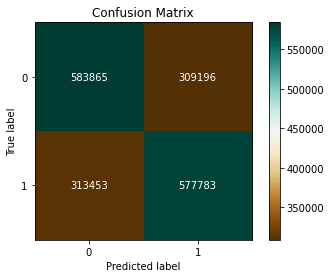

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
print(confusion_matrix(y_train, np.round(oof_preds)))
skplt.metrics.plot_confusion_matrix(y_train, np.round(oof_preds), cmap="BrBG")

In [ ]:
from sklearn.model_selection import learning_curve
plot_learning_curve(clf, X, y)

NameError: ignored

In [ ]:
from sklearn.metrics import average_precision_score
score = average_precision_score(val_x[target].values, check)
print('area under the precision-recall curve: {:.6f}'.format(score))

In [ ]:
from sklearn.metrics import roc_curve

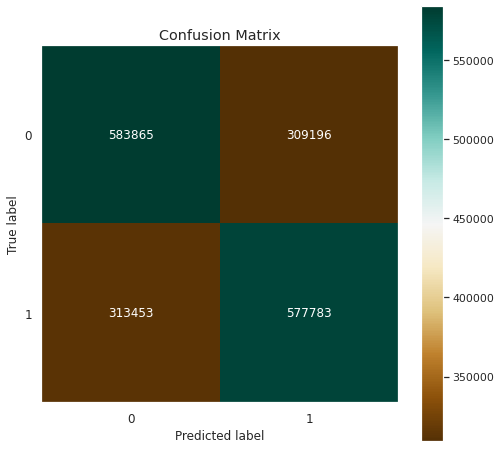

In [ ]:

sns.set(rc={'figure.figsize':(8,8)})
cm= skplt.metrics.plot_confusion_matrix(y_train, np.round(oof_preds), cmap="BrBG")

In [ ]:
CM = confusion_matrix(y_train, np.round(oof_preds))

In [ ]:
CM

array([[583865, 309196],
       [313453, 577783]])

In [ ]:
print("False positive rate : %f %%" % ((CM[0][1] / float(sum(CM[0])))*100))
print('False negative rate : %f %%' % ( (CM[1][0] /float(sum(CM[1]))*100)))

False positive rate : 34.622047 %
False negative rate : 35.170595 %


In [ ]:
fpr = CM[0][1] / float(sum(CM[0]))*100

In [ ]:
fnr = CM[1][0] /float(sum(CM[1]))*100

In [ ]:
fpr

309196

In [ ]:
print("true positive rate : %f %%" % ((CM[1][1] / float(sum(CM[1])))*100))
print('true negative rate : %f %%' % ( (CM[0][0] /float(sum(CM[0]))*100)))


true positive rate : 64.829405 %
true negative rate : 65.377953 %


In [ ]:
tpr = CM[1][1] / float(sum(CM[1]))*100

In [ ]:
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(val_x, clf)
roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
probs = clf.predict(val_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(val_y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: ignored

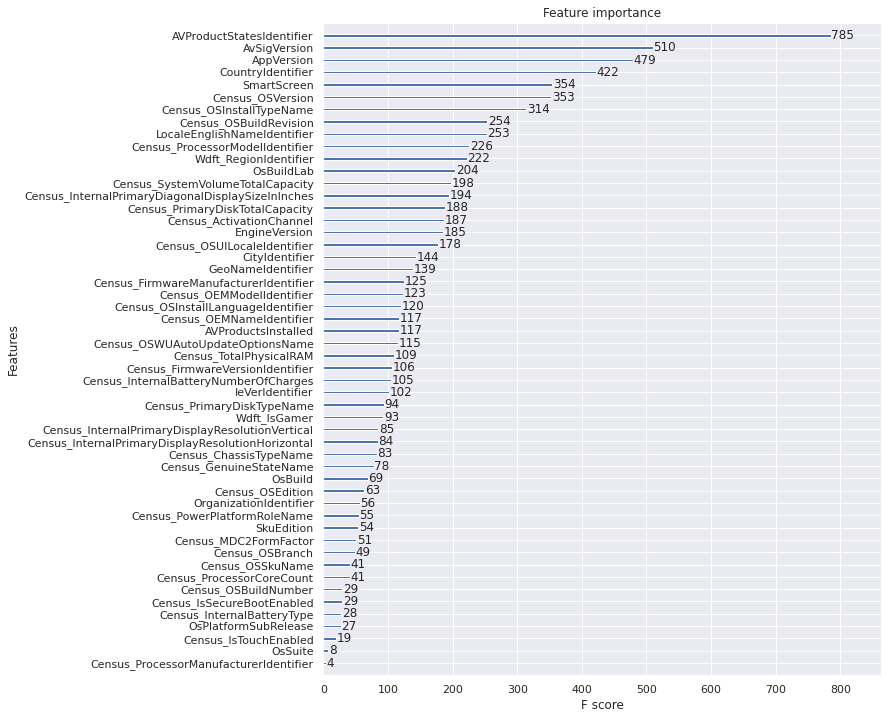

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,12)) 
xgb.plot_importance(clf, max_num_features=57, ax=ax)  

In [ ]:

oof_roc = roc_auc_score(y_train, oof_preds)


In [ ]:
print(oof_roc )

0.7122472107766223


## ***LGBM Model*** 
 lgb.train()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics


In [ ]:
param = {
    'objective' :'binary', 
                                   'class_weight' : 'balanced', 'learning_rate' :0.1, 
                                   'reg_alpha' : 0.1, 'reg_lambda' : 0.1, 
                                   'subsample' :0.8, 'n_jobs ':-1, 'random_state' : 50,
        'max_depth': -1

    }


   

In [ ]:
features = [c for c in train_sample.columns if c not in ['MachineIdentifier', 'HasDetections']]
target = train_sample['HasDetections']

In [ ]:
%%time
from sklearn.metrics import roc_auc_score, roc_curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros(len(train_sample))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

start = time.time()


for fold_, (trn_idx, val_idx) in enumerate(skf.split(train_sample.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train_sample.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_sample.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 4000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 50)
    oof[val_idx] = clf.predict(train_sample.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

fold n°0
Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.615534	valid_1's binary_logloss: 0.617481
[200]	training's binary_logloss: 0.610046	valid_1's binary_logloss: 0.613338
[300]	training's binary_logloss: 0.606915	valid_1's binary_logloss: 0.611686
[400]	training's binary_logloss: 0.604364	valid_1's binary_logloss: 0.610593
[500]	training's binary_logloss: 0.602095	valid_1's binary_logloss: 0.609808
[600]	training's binary_logloss: 0.600074	valid_1's binary_logloss: 0.60926
[700]	training's binary_logloss: 0.598026	valid_1's binary_logloss: 0.608696
[800]	training's binary_logloss: 0.596079	valid_1's binary_logloss: 0.608151
[900]	training's binary_logloss: 0.594286	valid_1's binary_logloss: 0.607764
[1000]	training's binary_logloss: 0.59256	valid_1's binary_logloss: 0.607491
[1100]	training's binary_logloss: 0.590872	valid_1's binary_logloss: 0.607145
[1200]	training's binary_logloss: 0.589306	valid_1's binary_logloss: 0.606969
[130

In [ ]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import lightgbm as lgb
import pandas as pd

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib for plot_example.py.')

# create dataset for lightgbm
# X_train = X_train.drop('TARGET', axis = 1)
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X, y, test_size=0.1,random_state=42)
lgb_train = lgb.Dataset(X_train_, Y_train_)
lgb_test = lgb.Dataset(X_test_, Y_test_, reference=lgb_train)

# specify your configurations as a dict
params = {'colsample_bytree': 0.48263575356020577, 'min_child_samples': 311, 
                  'min_child_weight': 1, 'num_leaves': 7, 'reg_alpha': 7, 'reg_lambda': 0.1, 
                  'subsample': 0.3542761367404292,  'metric': 'roc_auc'} 


print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=[X_train.columns.tolist()[i] for i in range(len(X_train.columns.tolist()))],
                verbose_eval=10)

Starting training...


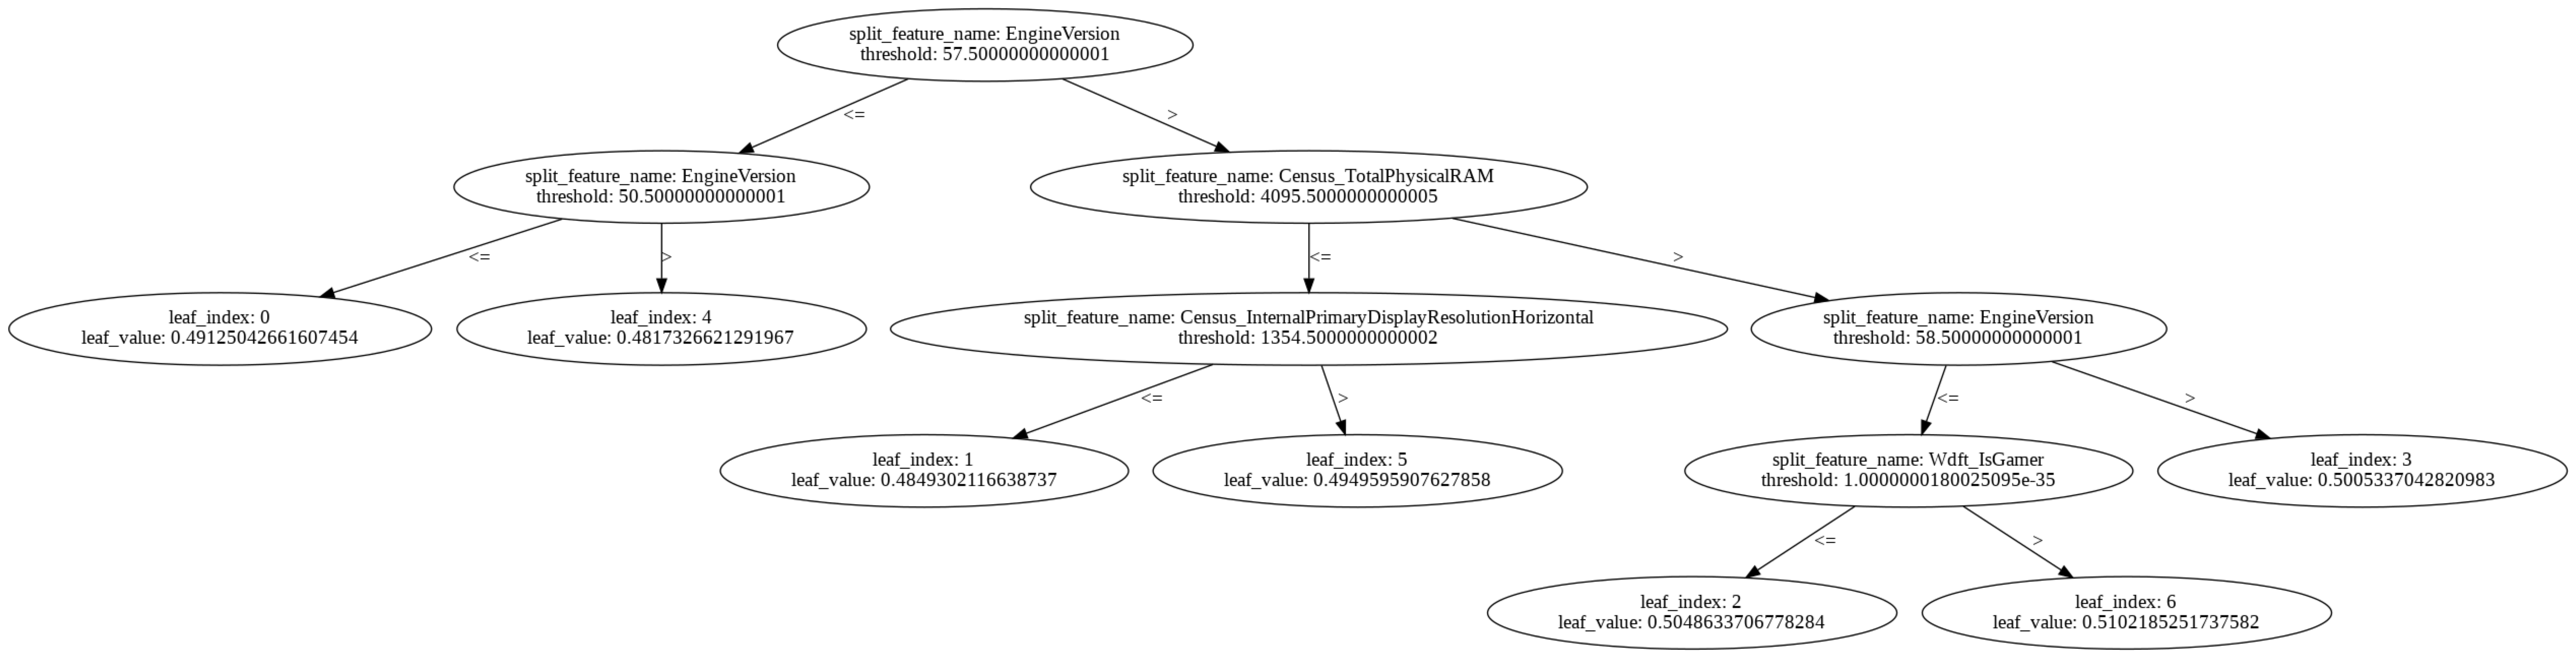

In [ ]:
import matplotlib.pyplot as plt
_ = lgb.plot_tree(gbm, figsize=(100, 100))
plt.savefig('roc_curve.png')

In [ ]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

   

# create dataset for lightgbm
#X_train = X_train.drop('HasDetections', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1,random_state=42)
xgb_train = xgb.DMatrix(X_train, Y_train)
xgb_test = xgb.DMatrix(X_test, Y_test)

# specify your configurations as a dict
params = {'tree_method': 'hist',
          #régression logistique pour la classification binaire, probabilité de sortie
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 #'learning_rate': 0.03,
 'max_depth': 11,
 'colsample_bytree': 0.4,
 'subsample': 1,
 'min_child_weight': 9,
 'gamma': 0.2,
 'silent': 1} 


print('Starting training...')
# train
clf = xgb.train(params,
                xgb_train,
                num_boost_round=3000,
                
                
                evals=[(xgb_train, "Train"), (xgb_test, "Val")],
                verbose_eval=100)

Starting training...
[0]	Train-auc:0.646976	Val-auc:0.639094
[100]	Train-auc:0.789104	Val-auc:0.723395
[200]	Train-auc:0.818225	Val-auc:0.721765
[300]	Train-auc:0.841475	Val-auc:0.71946
[400]	Train-auc:0.863227	Val-auc:0.717054
[500]	Train-auc:0.880043	Val-auc:0.714875
[600]	Train-auc:0.894949	Val-auc:0.712709
[700]	Train-auc:0.906926	Val-auc:0.711338
[800]	Train-auc:0.918576	Val-auc:0.709677


In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score,precision_recall_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import gc
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [ ]:
print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(target, oof), np.std((oof))))


CV AUC score 0.726869 & std 0.195014


In [ ]:
 from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import time
import random
    
import xgboost as xgb
    
    # xgboost parameters
eta = 0.01
estimators  = 8000
depth = 8
gamma_value = 0.4
colsample_bytree_value = 0.6
max_rounds = 400
  
    # create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
    
       

start_time = time.time()
clf_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'binary:logistic',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=max_rounds, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)
predictions_probas = clf_xgb.predict_proba(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("elapsed time in seconds: ", time.time() - start_time)
        
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
predictions_probas = clf_xgb.predict_proba(xvalid)
skplt.metrics.plot_roc(yvalid, predictions_probas)
        
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

print()
        #gc.collect()

[0]	validation_0-auc:0.676629	validation_1-auc:0.674759
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 400 rounds.
[100]	validation_0-auc:0.701915	validation_1-auc:0.698949
[200]	validation_0-auc:0.707223	validation_1-auc:0.703285
[300]	validation_0-auc:0.711857	validation_1-auc:0.706772
[400]	validation_0-auc:0.715909	validation_1-auc:0.70982
[500]	validation_0-auc:0.719365	validation_1-auc:0.712096
[600]	validation_0-auc:0.722551	validation_1-auc:0.71408
[700]	validation_0-auc:0.725179	validation_1-auc:0.715562
[800]	validation_0-auc:0.727364	validation_1-auc:0.716685
[900]	validation_0-auc:0.72941	validation_1-auc:0.717803
[1000]	validation_0-auc:0.731396	validation_1-auc:0.718871
[1100]	validation_0-auc:0.733235	validation_1-auc:0.719732
[1200]	validation_0-auc:0.734796	validation_1-auc:0.720392
[1300]	validation_0-auc:0.73628	validation_1-auc:0.720995
[1400]	validation_0-auc:0.737751

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['HasDetections'] = predictions
submission.to_csv('xgboost1.csv', index=False)

In [ ]:
lgbm=pd.read_csv('xgboost1.csv')

In [ ]:
lgbm.shape


(7853253, 2)

In [ ]:
(roc_auc_score(target, oof)

In [ ]:
train.shape

(8921483, 57)

In [ ]:
test.shape

(7853253, 55)

# **2end model lgbm**
lgb.LGBMClassifier +fit()

In [ ]:
! pip install scikit-plot

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(train_sample, test, encoding = 'ohe', n_folds = 5):
    
    """Former et tester un modèle GBM en utilisant la
     validation croisée.
    
    Paramètres
    --------
        features (pd.DataFrame): 
            cadre de données des fonctionnalités de formation à utiliser
             pour la formation d'un modèle. Doit inclure la colonne CIBLE.
        test_features (pd.DataFrame): 
            dataframe des fonctionnalités de test à utiliser
             pour faire des prédictions avec le modèle.
        encoding (str, default = 'ohe'): 
            méthode d'encodage de variables catégorielles. Soit 'ohe' pour un codage one-hot ou 'le' pour un codage d'étiquette
             n_folds (int, default = 5): nombre de plis à utiliser pour la validation croisée
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe avec `MachineIdentifier` et `HasDetections` probabilities
            prédites par le modèle.
        feature_importances (pd.DataFrame): 
            dataframe avec les fonctionnalités importantes du model.
        valid_metrics (pd.DataFrame): 
            dataframe de formation et validation avec la metric (ROC AUC) pour chaque pli et dans son ensemble..
        
 
    """
   
    # Extraction de la colonne de la cible
    labels = train_sample['HasDetections']
    train = train_sample.drop(columns = ['HasDetections'])
    

   # One Hot Encoding
    if encoding == 'ohe':
        
        # Alignement des dataframes
        train_sample, test = train_sample.align(test, join = 'inner', axis = 1)
        # Aucun index catégorique à enregistrer
        cat_indices = 'auto'
    
     # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Itération dans chaque colonne
        for i, col in enumerate(train_sample):
            if train_sample[col].dtype == 'object':
                train_sample[col] = label_encoder.fit_transform(np.array(train_sample[col].astype(str)).reshape((-1,)))
                test[col] = label_encoder.transform(np.array(test[col].astype(str)).reshape((-1,)))
                cat_indices.append(i)
    
    # Affichage d'une erreur
    else:
        raise ValueError("Encodage doit etre soit 'ohe' ou 'le'")
        
    print("LGBM Model ")
   
    # Extraction des noms des fonctionnalités
    feature_names     = list(train_sample.columns)
   
   
    
    # Créer un tableau avec np.array
    train_sample= np.array(train_sample)
    test = np.array(test)
    
    # Creation de kfold object
    # n_folds : nombre de segment
    # shuffle : si on mélange les données avant la décomposition
    # random_state : la graine de générateur de nombre aléatoire
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Tableau vide à remplir avec les fonctionnalités importantes 
    feature_importance_values = np.zeros(len(feature_names))
    
    # Tableau vide à remplir avec les probabilités prédites
    test_predictions = np.zeros(test.shape[0])
    
    # Tableau vide pour les prédictions de validation hors du fold(pli)
    out_of_fold = np.zeros(train_sample.shape[0])
    
    # Listes d'enregistrement de valid_scores et train_scores
    valid_scores = []
    train_scores = []
    
    # Itérer à travers chaque segment (fold)
    for train_indices, valid_indices in k_fold.split(train):
        
        # Données d'entraînement pour le segment (fold)
        train_features, train_labels = train_sample[train_indices], labels[train_indices]
        # Données de validation pour le segment (fold)
        valid_features, valid_labels = train_sample[valid_indices], labels[valid_indices]
        
        #train_features, train_labels = X.iloc[train_index, :], X.iloc[test_index, :]
        #valid_features, valid_labels = y[train_index], y[test_index]
        # Création du modèle
        # n_estimators = nbr d'arbres, objective = binaire
        # alpha, lamda = coefficient de pinalité, pour ne pas réduire la fonction coût rapidement
        # class_weight : poids de classe = équilibré
        # learning_rate = taux d'apprentissage
        # random_stat : pour fixer la suite aléatoire produite
        # subsample : sous échantiant
        # n_jobs = -1 tous les coeurs du processeur sont activés
        model = lgb.LGBMClassifier(n_estimators=4000,max_depth=3, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.01, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Tourner le model sur les données train, la metrique utilisée est AUC ROC
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 50, verbose = 200)
        
        # Meilleures iteration
        best_iteration = model.best_iteration_
        
        # Importances des variables 
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # predictions
        test_predictions += model.predict_proba(test, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Enregistrer les prédictions du fold
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Enregistrer le meilleur score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Nettoyer la mémoire
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
       
    # Faire la dataframe de soumission
    submission = pd.DataFrame({'MachineIdentifier': test_ids, 'HasDetections': test_predictions})
    
    # dataframe des fonctionnalités importantes
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Score de validation global
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Ajouter les scores globaux aux métriques
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Nécessaire pour créer une base de données de scores de validation
    fold_names = list(range(n_folds))
    fold_names.append('Score global')
   
    # Dataframe des scores de validation
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                   
                            'valid': valid_scores
                            }) 
    
    return submission,feature_importances, metrics
print('done')    

done


LGBM Model 
Training until validation scores don't improve for 50 rounds.
[200]	train's binary_logloss: 0.644582	train's auc: 0.674686	valid's binary_logloss: 0.644026	valid's auc: 0.675322
[400]	train's binary_logloss: 0.637152	train's auc: 0.68273	valid's binary_logloss: 0.636564	valid's auc: 0.683174
[600]	train's binary_logloss: 0.633912	train's auc: 0.687199	valid's binary_logloss: 0.633322	valid's auc: 0.687597
[800]	train's binary_logloss: 0.631439	train's auc: 0.691147	valid's binary_logloss: 0.630876	valid's auc: 0.691461
[1000]	train's binary_logloss: 0.629815	train's auc: 0.693612	valid's binary_logloss: 0.629278	valid's auc: 0.693837
[1200]	train's binary_logloss: 0.628624	train's auc: 0.695404	valid's binary_logloss: 0.628118	valid's auc: 0.695539
[1400]	train's binary_logloss: 0.627652	train's auc: 0.696903	valid's binary_logloss: 0.627185	valid's auc: 0.69694
[1600]	train's binary_logloss: 0.62685	train's auc: 0.698155	valid's binary_logloss: 0.626429	valid's auc: 0.6981

ValueError: ignored

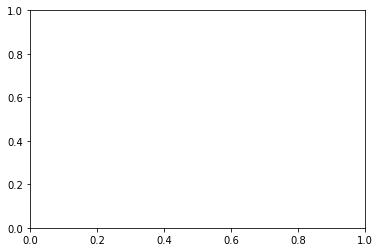

In [ ]:
  %%time
submission, fi, metrics = model(train_sample, test)
print('Baseline metrics')
print(metrics)


In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]
    
 #   new_seed =  random.randint(1, 2000)
    
    clf_xgb = lgb.LGBMClassifier(n_estimators=3000, max_depth=- 1, objective = 'binary', 
                                 colsample_bytree = 0.28 , num_leaves = 2**12 -1 , learning_rate = 0.05, 
                                  
                                    n_jobs = -1, random_state = 50
                          
                      
                            )


    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.546386	training's auc: 0.834796	valid_1's binary_logloss: 0.611368	valid_1's auc: 0.724676
[200]	training's binary_logloss: 0.484599	training's auc: 0.893737	valid_1's binary_logloss: 0.605226	valid_1's auc: 0.727961
[300]	training's binary_logloss: 0.437596	training's auc: 0.934251	valid_1's binary_logloss: 0.604589	valid_1's auc: 0.728095
[400]	training's binary_logloss: 0.400626	training's auc: 0.959444	valid_1's binary_logloss: 0.605106	valid_1's auc: 0.727627
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.433896	training's auc: 0.9368	valid_1's binary_logloss: 0.604473	valid_1's auc: 0.728222

              precision    recall  f1-score   support

           0       0.66      0.67      0.66    179012
           1       0.66      0.66      0.66    177848

    accuracy                           0.66    356860
   macro avg       0.66      0.66      0.66    

In [ ]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [ ]:
predictions_proba_test_list = [x / kf.n_splits for x in predictions_proba_test_list]


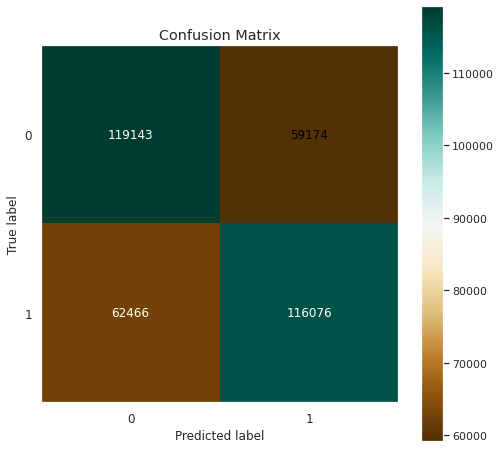

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(valid_y, predictions, cmap="BrBG")

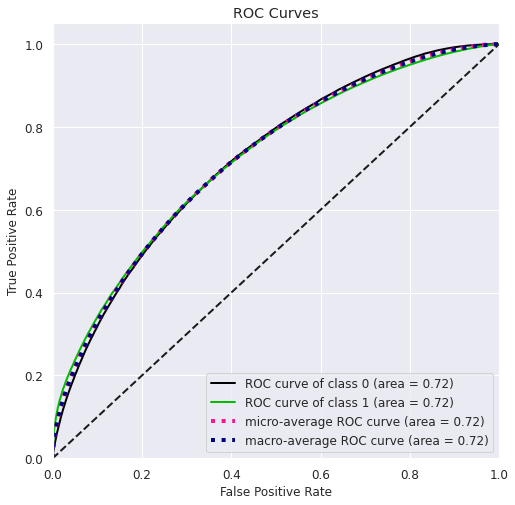

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
predictions_probas = clf_xgb.predict_proba(valid_X)
skplt.metrics.plot_roc(valid_y, predictions_probas)

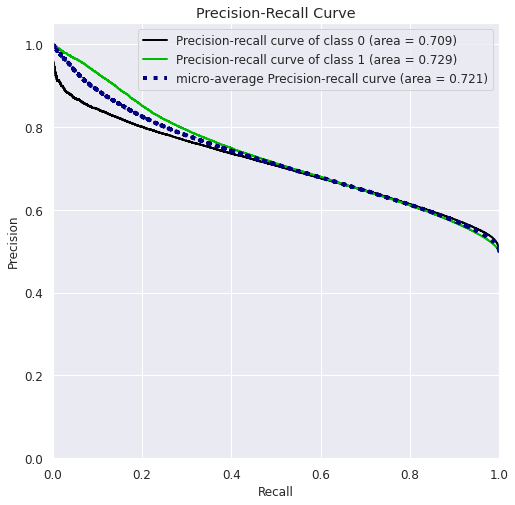

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(valid_y, predictions_probas)

#telechrg .html le notebook

In [ ]:
import os

In [ ]:
os.environ['COLAB_TPU_ADDR']

'10.14.77.90:8470'

In [ ]:
!jupyter nbconvert --to html nadia.ipynb

# XGBOOST WITH TUNING 

tuning de xgb avec 0.732

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test1 = {
 'max_depth':[3, 5, 7, 9, 11],
 'min_child_weight':[1, 3, 5, 7, 9,11]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=13,
                            min_child_weight=11,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch1.fit(train_X, train_y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.711, total= 4.7min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.713, total= 4.7min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.713, total= 4.8min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.2min remaining:    0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.711, total= 4.8min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test1 = {
   'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=35, gamma=9.943467991283027, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch1.fit(trn_x , trn_y)
gsearch1.best_params_, gsearch1.best_score_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.682, total=   5.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.683, total=   5.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.9s remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.684, total=   5.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.682, total=   5.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

({'max_depth': 9, 'min_child_weight': 5}, 0.7087917864047807)

In [ ]:
!pip3 install virtualenv


     |████████████████████████████████| 4.9MB 3.4MB/s 
     |████████████████████████████████| 337kB 49.7MB/s 


In [ ]:
!virtualenv theanoEnv

created virtual environment CPython3.6.9.final.0-64 in 349ms
  creator CPython3Posix(dest=/content/theanoEnv, clear=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==20.2.3, setuptools==50.3.1, wheel==0.35.1
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [ ]:
!source /content/theanoEnv/bin/activate;

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=35, gamma=9.943467991283027, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test2, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch2.fit(trn_x , trn_y)
gsearch2.best_params_, gsearch2.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ..... max_depth=4, min_child_weight=4, score=0.689, total=   8.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ..... max_depth=4, min_child_weight=4, score=0.691, total=   7.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ..... max_depth=4, min_child_weight=4, score=0.691, total=   7.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.5s remaining:    0.0s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] ..... max_depth=4, min_child_weight=5, score=0.689, total=   7.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

({'max_depth': 6, 'min_child_weight': 6}, 0.7087917864047807)

In [ ]:
param_test2b = {
'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=35, gamma=9.943467991283027, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test2b, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch2b.fit(trn_x , trn_y)
gsearch2b.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_child_weight=6 ..............................................
[CV] .................. min_child_weight=6, score=0.675, total=   5.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[CV] min_child_weight=6 ..............................................
[CV] .................. min_child_weight=6, score=0.677, total=   5.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s
[CV] min_child_weight=6 ..............................................
[CV] .................. min_child_weight=6, score=0.675, total=   4.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.1s remaining:    0.0s
[CV] min_child_weight=8 ..............................................
[CV] .................. min_child_weight=8, score=0.675, total=   5.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

({'min_child_weight': 6}, 0.7087917864047807)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=35, gamma=9.943467991283027, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test3, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch3.fit(trn_x , trn_y)
gsearch3.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gamma=0.0 .......................................................
[CV] ........................... gamma=0.0, score=0.675, total=   5.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[CV] gamma=0.0 .......................................................
[CV] ........................... gamma=0.0, score=0.677, total=   5.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s
[CV] gamma=0.0 .......................................................
[CV] ........................... gamma=0.0, score=0.675, total=   4.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.8s remaining:    0.0s
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.675, total=   4.8s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

({'gamma': 0.0}, 0.7087917864047807)

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=140, gamma=0, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test4, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)
gsearch4.fit(trn_x , trn_y)
gsearch4.best_params_, gsearch4.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] . colsample_bytree=0.6, subsample=0.6, score=0.687, total=  15.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] . colsample_bytree=0.6, subsample=0.6, score=0.689, total=  15.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.1s remaining:    0.0s
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] . colsample_bytree=0.6, subsample=0.6, score=0.688, total=  15.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.6s remaining:    0.0s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] . colsample_bytree=0.6, subsample=0.7, score=0.687, total=  15.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

({'colsample_bytree': 0.9, 'subsample': 0.6}, 0.6886697208238418)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=140, gamma=0, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test5, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)
gsearch5.fit(trn_x , trn_y)
gsearch5.best_params_, gsearch5.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bytree=0.75, subsample=0.75 ...........................
[CV]  colsample_bytree=0.75, subsample=0.75, score=0.687, total=  15.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s
[CV] colsample_bytree=0.75, subsample=0.75 ...........................
[CV]  colsample_bytree=0.75, subsample=0.75, score=0.689, total=  15.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.5s remaining:    0.0s
[CV] colsample_bytree=0.75, subsample=0.75 ...........................
[CV]  colsample_bytree=0.75, subsample=0.75, score=0.688, total=  15.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.7s remaining:    0.0s
[CV] colsample_bytree=0.75, subsample=0.8 ............................
[CV]  colsample_bytree=0.75, subsample=0.8, score=0.687, total=  15.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elap

({'colsample_bytree': 0.85, 'subsample': 0.8}, 0.688397534070643)

In [ ]:
params = {'tree_method': 'hist',
          #régression logistique pour la classification binaire, probabilité de sortie
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.09,
 'max_depth': 6,
 'colsample_bytree': 0.85,
 'subsample': 0.8,
 'min_child_weight': 4,
 'gamma': 0,
 'silent': 1}

In [ ]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
    
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('CV Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('CV Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('CV F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))

[0]	Train-auc:0.673604	Val-auc:0.670803
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.712633	Val-auc:0.708207
[200]	Train-auc:0.722187	Val-auc:0.715448
[300]	Train-auc:0.728045	Val-auc:0.718894
[400]	Train-auc:0.732571	Val-auc:0.721047
[500]	Train-auc:0.73652	Val-auc:0.722663
[600]	Train-auc:0.739978	Val-auc:0.723737
[700]	Train-auc:0.742999	Val-auc:0.724448
[800]	Train-auc:0.745969	Val-auc:0.725073
[900]	Train-auc:0.748654	Val-auc:0.725557
[1000]	Train-auc:0.751129	Val-auc:0.725828
[1100]	Train-auc:0.753487	Val-auc:0.726077
[1200]	Train-auc:0.755899	Val-auc:0.726382
[1300]	Train-auc:0.758116	Val-auc:0.72653
[1400]	Train-auc:0.760193	Val-auc:0.726695
[1500]	Train-auc:0.762372	Val-auc:0.726896
[1600]	Train-auc:0.764488	Val-auc:0.726992
[1700]	Train-auc:0.766451	Val-auc:0.727094
Stopping. Best iteration:
[1699]	Train-auc:0.766434	Val-auc:0.727096


Fold 1 AUC 0.727074 & std 0.19

In [ ]:
params = {'tree_method': 'hist',
          #régression logistique pour la classification binaire, probabilité de sortie
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.09,
 'max_depth': 10,
 'colsample_bytree': 0.85,
 'subsample': 0.8,
 'min_child_weight': 4,
 'gamma': 9,
 'silent': 1}



In [ ]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
    
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('CV Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('CV Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('CV F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))

[0]	Train-auc:0.690441	Val-auc:0.685406
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.736345	Val-auc:0.721015
[200]	Train-auc:0.747385	Val-auc:0.725366
[300]	Train-auc:0.754022	Val-auc:0.726833
[400]	Train-auc:0.759142	Val-auc:0.727569
[500]	Train-auc:0.763483	Val-auc:0.728008
[600]	Train-auc:0.767154	Val-auc:0.728309
[700]	Train-auc:0.770327	Val-auc:0.728432
[800]	Train-auc:0.77322	Val-auc:0.728577
[900]	Train-auc:0.775906	Val-auc:0.728663
Stopping. Best iteration:
[898]	Train-auc:0.775877	Val-auc:0.728676


Fold 1 AUC 0.728653 & std 0.201058
Fold 1 Precision 0.665563
Fold 1 Recall 0.656636
Fold 1 F1 score 0.661069
[0]	Train-auc:0.689875	Val-auc:0.688375
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.736474	Val-auc:0.721853
[200]	Train-auc:0.747657	Val-auc:0.725971
[3

# autre hyperparam

In [ ]:
param_test1 = {
 'max_depth':[3,4,10],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.0936165921314771, n_estimators=35, gamma=9.943467991283027, subsample=0.8246604621518232, colsample_bytree=0.3561271102144279,
                                                  objective= 'binary:logistic', nthread=-1, max_depth = 2,
                                                 silent = 1 , min_child_weight = 53), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch2.fit(trn_x , trn_y)
gsearch2.best_params_, gsearch2.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, min_child_weight=4 .................................
[CV] ..... max_depth=3, min_child_weight=4, score=0.682, total=   6.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[CV] max_depth=3, min_child_weight=4 .................................
[CV] ..... max_depth=3, min_child_weight=4, score=0.683, total=   6.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.7s remaining:    0.0s
[CV] max_depth=3, min_child_weight=4 .................................
[CV] ..... max_depth=3, min_child_weight=4, score=0.684, total=   6.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s remaining:    0.0s
[CV] max_depth=3, min_child_weight=5 .................................
[CV] ..... max_depth=3, min_child_weight=5, score=0.682, total=   6.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

({'max_depth': 10, 'min_child_weight': 4}, 0.710705813463072)

In [ ]:

params = {'tree_method': 'hist',
          #régression logistique pour la classification binaire, probabilité de sortie
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'learning_rate': 0.0936165921314771,
 'max_depth': 10,
 'colsample_bytree': 0.3561271102144279,
 'subsample': 0.8246604621518232,
 'min_child_weight': 4,
 'gamma': 9.943467991283027,
 'silent': 1}

In [ ]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])

feature_importance_df = pd.DataFrame()

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
    
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    dtrain = xgb.DMatrix(trn_x, trn_y, feature_names=trn_x.columns)
    dval = xgb.DMatrix(val_x, val_y, feature_names=val_x.columns)
    
    clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=4000, evals=[(dtrain, "Train"), (dval, "Val")],
        verbose_eval= 100, early_stopping_rounds=50) 
    
    oof_preds[val_idx] = clf.predict(xgb.DMatrix(val_x))
    sub_preds += clf.predict(xgb.DMatrix(test[train_cols])) / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
    fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    #print('Fold %1d Kappa score %.6f\n' % (n_fold + 1,cohen_kappa_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('CV Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('CV Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('CV F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))


[0]	Train-auc:0.640734	Val-auc:0.637005
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 50 rounds.
[100]	Train-auc:0.730863	Val-auc:0.720154
[200]	Train-auc:0.738579	Val-auc:0.724393
[300]	Train-auc:0.742608	Val-auc:0.726223
[400]	Train-auc:0.745384	Val-auc:0.727065
[500]	Train-auc:0.747809	Val-auc:0.727679
[600]	Train-auc:0.749833	Val-auc:0.728077
[700]	Train-auc:0.751553	Val-auc:0.72837
[800]	Train-auc:0.753066	Val-auc:0.728576
[900]	Train-auc:0.754581	Val-auc:0.72883
[1000]	Train-auc:0.755988	Val-auc:0.729008
[1100]	Train-auc:0.757257	Val-auc:0.729132
[1200]	Train-auc:0.758396	Val-auc:0.729251
[1300]	Train-auc:0.759561	Val-auc:0.729391
[1400]	Train-auc:0.760679	Val-auc:0.729504
[1500]	Train-auc:0.761639	Val-auc:0.729598
[1600]	Train-auc:0.762689	Val-auc:0.729648
[1700]	Train-auc:0.763665	Val-auc:0.729721
Stopping. Best iteration:
[1679]	Train-auc:0.763474	Val-auc:0.729725


Fold 1 AUC 0.729720 & std 0.19

In [ ]:
import sys

print (sys.version)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import time
import random
    
import xgboost as xgb
    
    # xgboost parameters
eta = 0.01
estimators  = 8000
depth = 8
gamma_value = 0.4
colsample_bytree_value = 0.6
max_rounds = 400
fold_auc_list = []
fold_accuracy_list = []
    # create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
    
       

start_time = time.time()
clf_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'binary:logistic',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=max_rounds, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)
predictions_probas = clf_xgb.predict_proba(xvalid)[:,1]

print()
print(classification_report(yvalid, predictions))
print()
print("accuracy_score", accuracy_score(yvalid, predictions))
    
print("auc score", roc_auc_score(yvalid, predictions_probas))
print()
    
fold_accuracy_list.append(accuracy_score(yvalid, predictions))
fold_auc_list.append(roc_auc_score(yvalid, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))


print("Mean accuracy:", np.mean(fold_accuracy_list))



print()
print("f1_score", f1_score(yvalid, predictions, average = "macro"))

print()
print("elapsed time in seconds: ", time.time() - start_time)
        
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
predictions_probas = clf_xgb.predict_proba(xvalid)
skplt.metrics.plot_roc(yvalid, predictions_probas)
        
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

print()
        #gc.collect()

[0]	validation_0-auc:0.676629	validation_1-auc:0.674759
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 400 rounds.
[100]	validation_0-auc:0.701915	validation_1-auc:0.698949
[200]	validation_0-auc:0.707223	validation_1-auc:0.703285
[300]	validation_0-auc:0.711857	validation_1-auc:0.706772
[400]	validation_0-auc:0.715909	validation_1-auc:0.70982
[500]	validation_0-auc:0.719365	validation_1-auc:0.712096
[600]	validation_0-auc:0.722551	validation_1-auc:0.71408
[700]	validation_0-auc:0.725179	validation_1-auc:0.715562
[800]	validation_0-auc:0.727364	validation_1-auc:0.716685
[900]	validation_0-auc:0.72941	validation_1-auc:0.717803
[1000]	validation_0-auc:0.731396	validation_1-auc:0.718871
[1100]	validation_0-auc:0.733235	validation_1-auc:0.719732
[1200]	validation_0-auc:0.734796	validation_1-auc:0.720392
[1300]	validation_0-auc:0.73628	validation_1-auc:0.720995
[1400]	validation_0-auc:0.737751

ValueError: ignored

In [ ]:
predictions_probas = clf_xgb.predict_proba(xvalid)[:,1]

In [ ]:
print("auc score", roc_auc_score(yvalid, predictions_probas))
print()

In [ ]:
 from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import time
import random
    
import xgboost as xgb

    # xgboost parameters

eval_metric = ["auc","error"]
    # create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
    
       

start_time = time.time()
  clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=100, eval_metric=eval_metric, verbose=100)

predictions = clf_xgb.predict(xvalid)
predictions_probas = clf_xgb.predict_proba(xvalid)[:,1]

print()
print(classification_report(yvalid, predictions))

print()
print("acc", accuracy_score(yvalid, predictions))
print("auc", roc_auc_score(yvalid, predictions_probas))

print()
print("elapsed time in seconds: ", time.time() - start_time)
        
skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
predictions_probas = clf_xgb.predict_proba(xvalid)
skplt.metrics.plot_roc(yvalid, predictions_probas)
        
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

print()
        #gc.collect()

[0]	validation_0-auc:0.676364	validation_0-error:0.379179	validation_1-auc:0.674792	validation_1-error:0.380336
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.


KeyboardInterrupt: ignored

In [ ]:
predictions = clf_xgb.predict(test)
                   
submission = pd.read_csv('sample_submission.csv')
submission['HasDetections'] = [int(i) for i in predictions]


submission.to_csv('submission.csv', index=False)

In [ ]:
nadia = pd.read_csv('submission.csv')

In [ ]:
nadia.head(20)

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,1
1,00000176ac758d54827acd545b6315a5,1
2,0000019dcefc128c2d4387c1273dae1d,0
3,0000055553dc51b1295785415f1a224d,0
4,00000574cefffeca83ec8adf9285b2bf,1
5,000007ffedd31948f08e6c16da31f6d1,1
6,000008f31610018d898e5f315cdf1bd1,0
7,00000a3c447250626dbcc628c9cbc460,0
8,00000b6bf217ec9aef0f68d5c6705897,0
9,00000b8d3776b13e93ad83676a28e4aa,0


In [ ]:
models = pd.DataFrame({
    'Model': ['catboost', 'xgboost'],
    
    'Score': [acc_log_reg, acc_svc]
    })

models = models.sort_values(by='Score', ascending=False)
models

In [ ]:
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

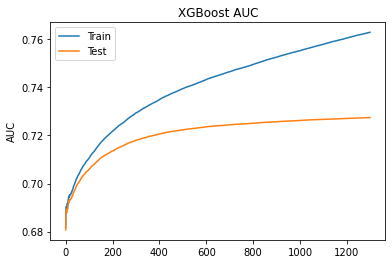

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [ ]:
If you want to look at classification error, change ['auc'] to ['error'] within ax.plot

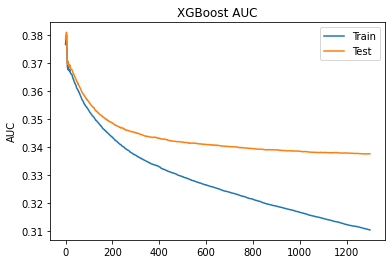

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

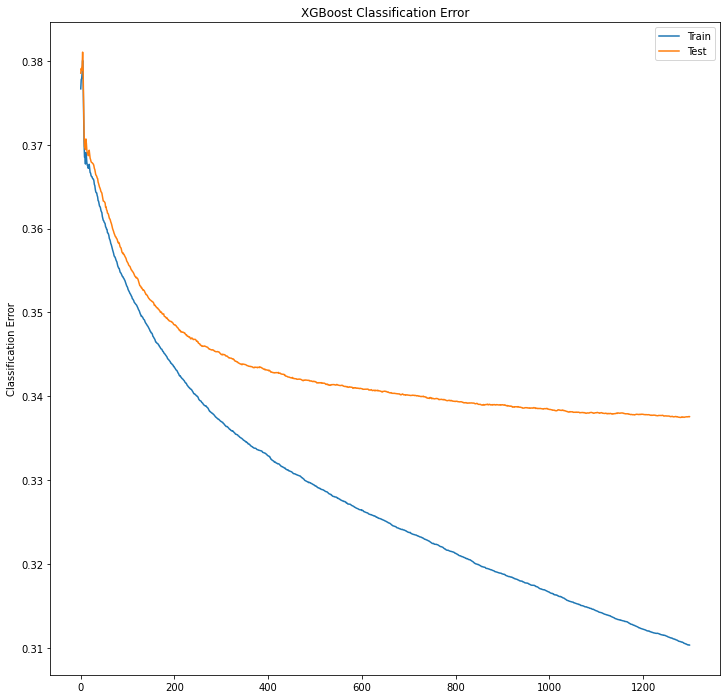

In [ ]:
    # plot classification error
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

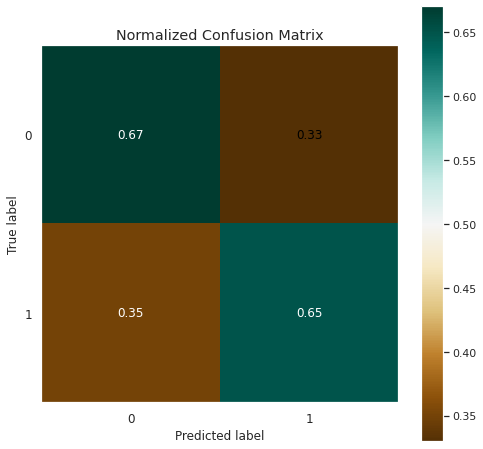

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG",normalize=True)

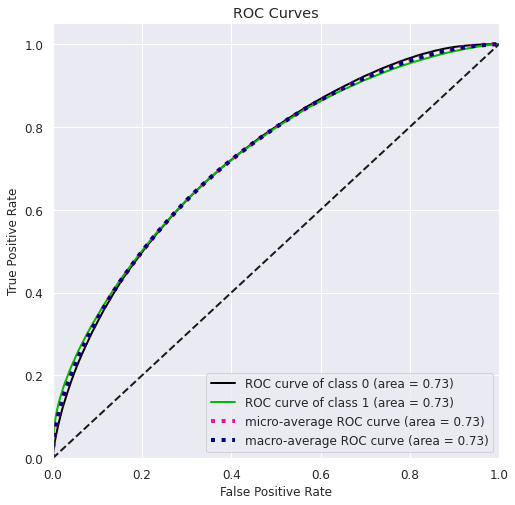

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
predictions_probas = clf_xgb.predict_proba(xvalid)
skplt.metrics.plot_roc(yvalid, predictions_probas)

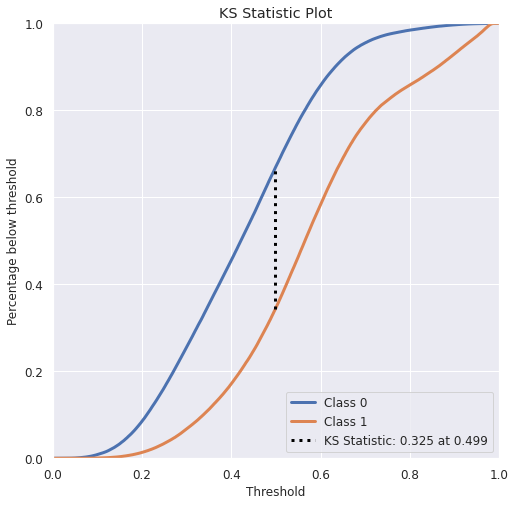

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

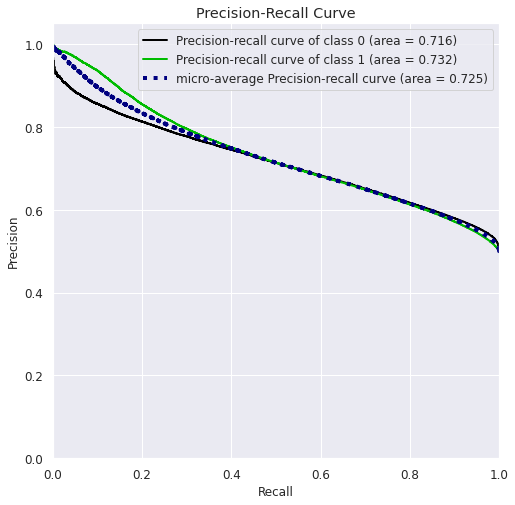

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

In [ ]:
from sklearn.model_selection import learning_curve
learning_curve(clf_xgb, X, y)

In [ ]:

train_cols = [c for c in train_sample.columns if c not in ["HasDetections"]]
y_train = train_sample["HasDetections"]

In [ ]:
%%time

oof_preds = np.zeros(train_sample.shape[0])
sub_preds = np.zeros(test.shape[0])
feature_importance_df = pd.DataFrame()

#for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train_sample, y_train)):
for trn_idx, val_idx in folds.split(train_sample, y_train):
    trn_x, trn_y = train_sample[train_cols].iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = train_sample[train_cols].iloc[val_idx], y_train.iloc[val_idx]
    
    clf =xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=1300, 
                            max_depth=4,
                            min_child_weight=4,
                            gamma=0,
                            subsample=0.8,
                            colsample_bytree=0.7,
                            objective= 'binary:logistic',
                      
                           silent = 1)
    clf.fit(trn_x, trn_y, 
        eval_set=[(trn_x, trn_y), (val_x, val_y)], 
        eval_metric = 'auc', 
        verbose = 100, 
        early_stopping_rounds = 50)

    
    oof_preds[val_idx] = clf.predict_proba(val_x,ntree_limit=clf.n_estimators)[:, 1]
    
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_x, oof_preds[va_idx])))
    


    sub_preds += clf.predict_proba(test[train_cols])[:, 1] / folds.n_splits
        

 

    print('\nFold %1d AUC %.6f & std %.6f' %(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx]), np.std([oof_preds[val_idx]])))
    print('Fold %1d Precision %.6f' %(n_fold + 1, precision_score(val_y, np.round(oof_preds[val_idx])) ))
    print('Fold %1d Recall %.6f' %(n_fold + 1, recall_score(val_y, np.round(oof_preds[val_idx]) )))
    print('Fold %1d F1 score %.6f' % (n_fold + 1,f1_score(val_y, np.round(oof_preds[val_idx]))))
    gc.collect()

print('\nCV AUC score %.6f & std %.6f' % (roc_auc_score(y_train, oof_preds), np.std((oof_preds))))
print('Cross validation Precision score %.6f' % (precision_score(y_train, np.round(oof_preds))))
print('Cross validation Recall score %.6f' % (recall_score(y_train, np.round(oof_preds))))
print('Cross validation F1 score %.6f' % (f1_score(y_train, np.round(oof_preds))))


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Faire le classifieur de forêt aléatoire
# n_estimators : nombre d'arbre de la forêt
# random_state : pour fixer la suite des chiffres simulés aléatoirement
# verbose : =1 pour afficher tous le déroulement de l'algorithme
# n_jobs : -1 ca veut dire activer tous les coeur du processeur
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
train_labels = train_sample['HasDetections']


In [ ]:
features = list(train_sample.columns)

In [ ]:
test.shape

(7853253, 21)

In [ ]:
# application sur les données d'entrainement
random_forest.fit(train, train_labels)

# Extraire les importances des fonctionnalités
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Calculer les prédictions sur les données de test
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:   23.5s finished


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Supprimer la cible des données d'entraînement
if 'HasDetections' in train_sample:
    train = train_sample.drop(columns = ['HasDetections'])
else:
    train = train_sample.copy()
    
# noms des fonctionnalités
features = list(train.columns)

# Copie des données de test
test = test.copy()

# Imputation des valeur manquante par la mediane
imputer =SimpleImputer(strategy = 'median')

# Centrer et réduir les données
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit sur les données d'entraînement
imputer.fit(train)

# Transformer les données de formation et de test
train = imputer.transform(train)
test = imputer.transform(test)

# Répétez avce scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Forme de données d'entrainement: ", train.shape)
print("Forme de données du test: ", test.shape)

Forme de données d'entrainement:  (1784297, 21)
Forme de données du test:  (7853253, 21)


In [ ]:
def plot_feature_importances(df):
    """
    Plot les importances renvoyées par le model. Cela peut fonctionner avec n'importe quelle mesure des
    fonctionnalités à condition que l'importance est grande.
    
    Args:
        df (dataframe): feature importances. Doit avoir les fonctionnalités dans une colonne
         appelé `features` et les importances dans une colonne appelée` importance
        
    Returns:
        affiche un plot des 15 fonctionnalités les plus importantes
        
        df (dataframe): les fonctionnalités importantes sont ordonnées selon leur importance (ordre décroissant) 
        avec une colonne d'importance normalisée
        """
    
    # Trier les fonctionnalités par importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normaliser les importances de fonctionnalités pour ajouter jusqu'à un
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Faire un graphique à barres horizontales de l'importance des fonctionnalités
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Besoin d'inverser l'index pour tracer le plus important en haut
    ax.barh(list(reversed(list(df.index[:21]))), 
            df['importance_normalized'].head(21), 
            align = 'center', edgecolor = 'k')
    
    # Définir les étiquettes
    ax.set_yticks(list(reversed(list(df.index[:21]))))
    ax.set_yticklabels(df['feature'].head(21))
    
    # Plot labeling
    plt.xlabel('Importance normalisée'); plt.title('Fonctionnalités importantes')
    plt.show()
    
    return df

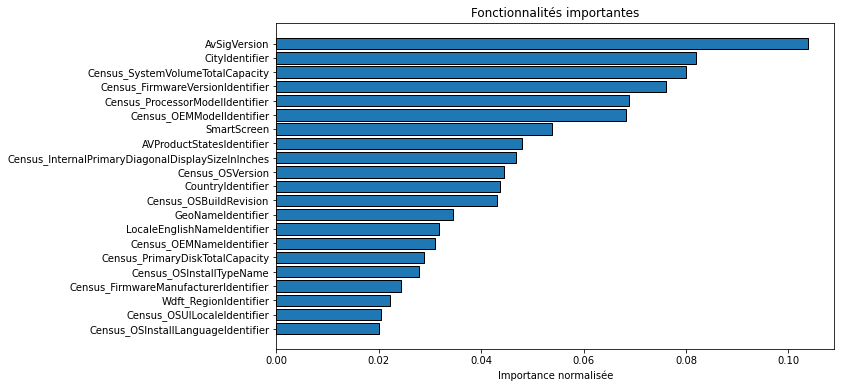

In [ ]:
# Afficher les importances des fonctionnalités pour les fonctionnalités par défaut
feature_importances_sorted = plot_feature_importances(feature_importances)

In [ ]:
feature_importances

,feature,importance
0,AvSigVersion,0.103797
1,AVProductStatesIdentifier,0.047974
2,CountryIdentifier,0.043596
3,CityIdentifier,0.081925
4,GeoNameIdentifier,0.034477
5,LocaleEnglishNameIdentifier,0.031794
6,SmartScreen,0.053861
7,Census_OEMNameIdentifier,0.031065
8,Census_OEMModelIdentifier,0.068350
9,Census_ProcessorModelIdentifier,0.068819


# Essey (feature selection )

In [ ]:
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np

from sklearn.model_selection import train_test_split # To split data
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing # To get MinMax Scaler function

# To plot inline
%matplotlib inline

In [ ]:
# Initializing the MinMaxScaler function
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
# Scaling dataset keeping the columns name
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

In [ ]:
# Splitting  up data, seting 75% for train and 25% for test.
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

In [ ]:
# Initialize SelectKBest function
UnivariateFeatureSelection = SelectKBest(chi2, k=35).fit(x_train, y_train)

In [ ]:
# Creating a dict to visualize which features were selected with the highest score
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(diccionario.items())

[(0.147215241885642, 'OrganizationIdentifier'),
 (0.20194262186284676, 'Census_IsFlightingInternal'),
 (0.2884864831993128, 'Census_ThresholdOptIn'),
 (0.2965540776496568, 'Census_InternalBatteryType'),
 (0.5368998996644065, 'Census_FirmwareVersionIdentifier'),
 (0.6398408832906333, 'Census_OSUILocaleIdentifier'),
 (0.9980641368401897, 'Census_IsWIMBootEnabled'),
 (1.0258011308500699, 'Census_OSInstallLanguageIdentifier'),
 (1.7952337580567852, 'GeoNameIdentifier'),
 (1.8112319566564001, 'Census_OEMModelIdentifier'),
 (1.9052817428743687, 'Census_SystemVolumeTotalCapacity'),
 (2.340402305944219, 'Census_GenuineStateName'),
 (2.446377000489406, 'Census_InternalPrimaryDisplayResolutionVertical'),
 (3.005487402613765, 'CityIdentifier'),
 (3.6454263266937916, 'Census_IsSecureBootEnabled'),
 (4.992790275100289, 'Census_ProcessorManufacturerIdentifier'),
 (8.2747676642783, 'CountryIdentifier'),
 (11.37697859653652, 'Census_InternalPrimaryDisplayResolutionHorizontal'),
 (13.302165942638776, '

In [ ]:
#Using the 'UnivariateFeatureSelection' based on 'SelectKBest' function,
# let's extract the best features from the original dataset

x_train_k_best = UnivariateFeatureSelection.transform(x_train)
x_test_k_best = UnivariateFeatureSelection.transform(x_test)

In [ ]:
print("Shape of original data: ", x_train.shape)
print("Shape of corpus with best features: ", x_train_k_best.shape)

Shape of original data:  (1427437, 55)
Shape of corpus with best features:  (1427437, 35)


In [ ]:
# Initializing and fitting data to the random forest classifier
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(x_train_k_best, y_train)

In [ ]:
# Making a prediction and calculting the accuracy
y_pred = RandForest_K_best.predict(x_test_k_best)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.6402594855125259


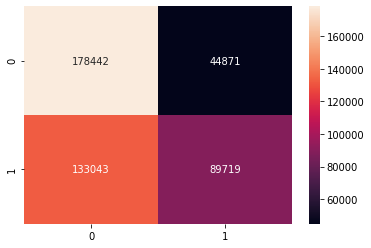

In [ ]:
# Showing performance with a confusion matrix
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")


In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=25, step=1)
rfe = rfe.fit(x_train, y_train)

In [ ]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

essey feature selection

In [ ]:
test = test[selected_feat]

In [ ]:
test.shape

(7853253, 21)

In [ ]:
train_sample.head()

,EngineVersion,AvSigVersion,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,GeoNameIdentifier,SmartScreen,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_OSVersion,Census_OSBuildRevision,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,HasDetections
0,58,6980,53447.0,8,85219.0,205.0,9,1443.0,275891.0,2272.0,953869.0,23.000000,282,165,14,6,27.0,120,355.0,19951.0,11.0,1
1,58,6999,53447.0,129,54198.0,126.0,9,2102.0,248850.0,2660.0,476940.0,13.203125,282,165,14,6,18.0,72,486.0,48753.0,3.0,0
2,58,7321,46781.0,149,122689.0,181.0,9,2206.0,238234.0,2998.0,244198.0,15.500000,65,1176,2,7,24.0,109,554.0,33111.0,15.0,0
3,59,7501,53447.0,164,114587.0,205.0,9,525.0,265410.0,2880.0,228936.0,15.500000,289,286,2,2,27.0,120,142.0,48473.0,15.0,1
4,59,7677,47238.0,207,72421.0,277.0,9,1443.0,256478.0,198.0,476940.0,15.500000,285,228,14,7,8.0,31,355.0,4343.0,13.0,1


In [ ]:
train_sample.shape

(1784297, 22)

In [ ]:
train_sample.head()

In [ ]:
train = train[good_cols]

In [ ]:

 'EngineVersion',
 'AppVersion',
 'AVProductsInstalled',
 'OrganizationIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'Census_MDC2FormFactor',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',

# fit xgb


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# nadia

In [ ]:
 %%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]

    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.690704	validation_1-auc:0.684981
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.733636	validation_1-auc:0.716093
[200]	validation_0-auc:0.749958	validation_1-auc:0.722798
[300]	validation_0-auc:0.760668	validation_1-auc:0.726149
[400]	validation_0-auc:0.768406	validation_1-auc:0.727812
[500]	validation_0-auc:0.774161	validation_1-auc:0.728902
[600]	validation_0-auc:0.779129	validation_1-auc:0.729728
[700]	validation_0-auc:0.783927	validation_1-auc:0.730272
[800]	validation_0-auc:0.788013	validation_1-auc:0.730679
[900]	validation_0-auc:0.791543	validation_1-auc:0.730992
[1000]	validation_0-auc:0.795255	validation_1-auc:0.731316
[1100]	validation_0-auc:0.798557	validation_1-auc:0.731543
[1200]	validation_0-auc:0.801928	validation_1-auc:0.731778
[1300]	validation_0-auc:0.805357	validation_1-auc:0.73203
[1400]	validation_0-a

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test1 = {
    # based on previous personal kernels both parameters show better result having high numbers 
 'max_depth':[3, 5, 7, 9, 11,13],
 'min_child_weight':[1, 3, 5, 7, 9,11]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.03, n_estimators=50, gamma=0.2, subsample=1, colsample_bytree=0.4,
                                                  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 0.6, 
                                                reg_lambda =3, seed=42), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch1.fit(train_X, train_y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.677, total=   7.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.679, total=   7.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.4s remaining:    0.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.679, total=   7.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s remaining:    0.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.677, total=   7.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 13, 'min_child_weight': 1}, 0.711798890095365)

In [ ]:
best_params_1 = gsearch1.best_params_
print(best_params_1)
del gsearch1
gc.collect()

{'max_depth': 13, 'min_child_weight': 1}


89

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test2 = {
 'gamma':[0, 0.2, 0.4]
}
gsearch11 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.03, n_estimators=50, 
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"], subsample=1, colsample_bytree=0.4,
                                                  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 0.6, 
                                                reg_lambda =3, seed=42), 
                        param_grid = param_test2, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch11.fit(train_X, train_y)
gsearch11.best_params_, gsearch11.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gamma=0 .........................................................
[CV] ............................. gamma=0, score=0.711, total=  34.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.8s remaining:    0.0s
[CV] gamma=0 .........................................................
[CV] ............................. gamma=0, score=0.712, total=  35.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[CV] gamma=0 .........................................................
[CV] ............................. gamma=0, score=0.712, total=  34.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s
[CV] gamma=0.2 .......................................................
[CV] ........................... gamma=0.2, score=0.711, total=  34.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.2}, 0.711798890095365)

In [ ]:
best_params_11 = gsearch11.best_params_
print(best_params_11)
del gsearch11
gc.collect()

{'gamma': 0.2}


0

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test3 = {
 'subsample':[0.4, 0.6, 0.8, 1],
 "colsample_bytree": [0.2, 0.4, 0.6, 0.8]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.03, n_estimators=50, gamma = best_params_11["gamma"],
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"],
                                                      objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 0,
                                                      reg_lambda =1, seed=42), 
                        param_grid = param_test3, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch3.fit(train_X, train_y)
gsearch3.best_params_, gsearch3.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bytree=0.2, subsample=0.4 .............................
[CV] . colsample_bytree=0.2, subsample=0.4, score=0.704, total=  27.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s
[CV] colsample_bytree=0.2, subsample=0.4 .............................
[CV] . colsample_bytree=0.2, subsample=0.4, score=0.706, total=  28.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.5s remaining:    0.0s
[CV] colsample_bytree=0.2, subsample=0.4 .............................
[CV] . colsample_bytree=0.2, subsample=0.4, score=0.701, total=  30.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s
[CV] colsample_bytree=0.2, subsample=0.6 .............................
[CV] . colsample_bytree=0.2, subsample=0.6, score=0.706, total=  32.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.4, 'subsample': 0.8}, 0.7122900870659855)

In [ ]:
best_params_3 = gsearch3.best_params_
print(best_params_3)
del gsearch3
gc.collect()

{'colsample_bytree': 0.4, 'subsample': 0.8}


65

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import time
import random

K = 5
index = 0
predictions_proba_test_list = np.zeros(len(test))
fold_auc_list = []
fold_accuracy_list = []

kf = KFold(n_splits = K, random_state = 42, shuffle = True)

for train_index, test_index in kf.split(X):
    
    print("Fold:", index)
    index = index + 1
    
    train_X, valid_X = X.iloc[train_index, :], X.iloc[test_index, :]
    train_y, valid_y = y[train_index], y[test_index]

    
    clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=13,
                            min_child_weight=1,
                            gamma=0.2,
                            subsample=0.8,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            
        
                            seed=42)

    clf_xgb.fit(train_X, train_y, eval_set=[(train_X, train_y), (valid_X, valid_y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)
    
    temp_predictions_proba_test_list = []

    # read test set in chunks
    chunck = 400000
    test_times = test.shape[0] // chunck
    test_rest = test.shape[0] % chunck

    for i in  np.arange(0,(chunck * (test_times+1)), chunck):
        
        # create predictions in chunks due ot memory limitations
        predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
        temp_predictions_proba_test_list.append(predictions_proba_test)
        #print("times:", i)


    # flatten the list of lists
    temp_predictions_proba_test_list = [y for x in temp_predictions_proba_test_list for y in x]
    
    
    #print(np.shape(predictions_proba_test_list))
    predictions_proba_test_list = [sum(x) for x in zip(predictions_proba_test_list, temp_predictions_proba_test_list)]
    #print(test.shape)
    #print(np.shape(predictions_proba_test_list))

    
    predictions = clf_xgb.predict(valid_X, ntree_limit=clf_xgb.n_estimators)

    print()
    print(classification_report(valid_y, predictions))

    print()
    print("accuracy_score", accuracy_score(valid_y, predictions))
    
    predictions_probas = clf_xgb.predict_proba(valid_X)[:,1]
    print("auc score", roc_auc_score(valid_y, predictions_probas))
    print()
    
    fold_accuracy_list.append(accuracy_score(valid_y, predictions))
    fold_auc_list.append(roc_auc_score(valid_y, predictions_probas))

print()
print("Mean auc:", np.mean(fold_auc_list))
print("Std auc:", np.std(fold_auc_list))

print("Mean accuracy:", np.mean(fold_accuracy_list))
print("Std accuracy:", np.std(fold_accuracy_list))

gc.collect()

Fold: 0
[0]	validation_0-auc:0.700775	validation_1-auc:0.683313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.768435	validation_1-auc:0.718606
[200]	validation_0-auc:0.798634	validation_1-auc:0.725321
[300]	validation_0-auc:0.819489	validation_1-auc:0.728247
[400]	validation_0-auc:0.8343	validation_1-auc:0.729655
[500]	validation_0-auc:0.845924	validation_1-auc:0.730438
[600]	validation_0-auc:0.855087	validation_1-auc:0.730829
[700]	validation_0-auc:0.864568	validation_1-auc:0.731183
[800]	validation_0-auc:0.872435	validation_1-auc:0.73142
[900]	validation_0-auc:0.879496	validation_1-auc:0.731479
[1000]	validation_0-auc:0.88615	validation_1-auc:0.731515
Stopping. Best iteration:
[958]	validation_0-auc:0.88337	validation_1-auc:0.73158


              precision    recall  f1-score   support

           0       0.66      0.67      0.67    179012
        